==========================================================================================================

# **MILESTONE 2**

==========================================================================================================

# **i. Perkenalan**

* Nama  : Fadhil Athallah
* Batch : HCK-015

* Link huggingface : https://huggingface.co/spaces/FadhilAthallah/Milestone_2_Fadhil_Athallah
* Link Kaggle      : https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset

Seorang investor budidaya jamur telah menghire kamu untuk melakukan analisis klasifikasi apakah sebuah jamur dapat dimakan atau tidak, dengan harapan pengusahan tersebut dapat menjual jamur-jamur yang dapat dimakan ke retauran-ratauran yang ada. Program ini dibuat untuk melakukan pengelompokkan jamur yang dapat dimakan atau tidak dapat dimakan menggunakan **klasifikasi**. Data yang digunakan merupakan data informasi jamur mulai dari ukuran, warna, tinggi, dan lebar dari jamur. Dataset ini diambil dari kaggle mushroom dataset. Dibawah ini merupakan keterangan dari tiap fitur pada dataframe:

| Feature          | Description                                                     |
|------------------|-----------------------------------------------------------------|
| Cap Diameter     | Width of the cap.                                               |
| Cap Shape        | Shape of the cap.                                               |
| Gill Attachment  | How gills are connected.                                        |
| Gill Color       | Color of the gills.                                             |
| Stem Height      | Height of the stem.                                             |
| Stem Width       | Width of the stem.                                              |
| Stem Color       | Color of the stem.                                              |
| Season           | Time of year when the mushroom usually grows.                    |
| Class            | 0 = edible, 1 = poisonous                                       |


# **ii. Import Libraries**

In [1]:
# Import Library
# library dataframe
import pandas as pd
# library olah data numerical
import numpy as np
# library statistik
from scipy import stats
from scipy.stats import uniform

# Data visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Pemodelan ML
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier


# Evaluasi model
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score , classification_report , confusion_matrix,precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.svm import SVC
from scipy.stats import uniform, randint
from sklearn.model_selection import cross_validate

# Library handling outlier
from feature_engine.outliers import Winsorizer
# library statistik
from scipy.stats import pearsonr, kendalltau, spearmanr
# lib pipelines
from sklearn.pipeline import Pipeline

# Save model
import pickle
import joblib
import json


# **iii. Data Loading**
Proses memasukkan data disertai dengan pengecekan tipe, jumlah. unique, dan duplikat

In [2]:
# Load datasframe
data = pd.read_csv('mushroom_cleaned.csv')

* Data mushroom_cleaned.csv berhasil di masukkan

In [3]:
data.head(10)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
5,1337,6,2,10,3.775635,1520,11,0.943195,1
6,1300,2,2,10,3.835320,1563,11,1.804273,1
7,1354,6,2,10,3.676160,1532,11,0.888450,1
8,1222,6,2,10,3.771656,1476,11,0.943195,1
9,1085,6,2,10,3.775635,1581,11,0.888450,1


In [4]:
data.tail(10)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
54025,70,2,3,2,1.325429,454,12,0.888450,1
54026,68,6,3,2,1.233912,429,12,0.888450,1
54027,80,6,3,2,0.700728,608,12,0.943195,1
54028,80,5,3,2,1.054858,412,12,0.888450,1
54029,97,6,3,2,0.509736,527,12,0.943195,1
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1
54034,72,5,3,2,1.158311,492,12,0.888450,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


* Data memiliki jumlah entry sebanyak 54035 dengan total 9 kolom
* Seluruh tipe data sudah berupa tipe numerikal

Data yang berhasil dimasukkan akan dilakukan pengujian jumlah unique value dimana jika kolom tersebut hanya memiliki satu nilai unique kolom tersebut dapat dihapuskan karena tidak memiliki pengaruh

In [6]:
data.nunique()

cap-diameter       1847
cap-shape             7
gill-attachment       7
gill-color           12
stem-height        1455
stem-width         3510
stem-color           13
season                4
class                 2
dtype: int64

* Seluruh data memiliki nilai unique >1 yang artinya semua kolom dapat digunakan 
* Berdasarkan jumlah nuniquenya dapat diketahui bahwa kolom `cap_shape`, `gill-attachment`, `gill-color`, `stem-color`, `season`, dan `class` merupakan data ordinal

Setelah nunique, pengecekan selanjutnya adalah pengecekan apakah data mengandung nilai duplikat atau tidak

In [7]:
print(f'Data duplikat : {data.duplicated().sum()}')

Data duplikat : 303


* Dari total entry berjumlah 54035 sebanyak 303 adalah sebuah data duplikat. Untuk membantu proses pembentukan pola pada model nantinya nilai duplikat ini harus dihapuskan karena ditakuti dapat membuat pembacaan pola condong ke suatu nilai tertentu

In [8]:
df= data.drop_duplicates()
print(f'Data duplikat : {df.duplicated().sum()}')

Data duplikat : 0


* Data duplikat telah berhasil dihapuskan

Proses loading telah dilakukan dan akan dilanjutkan ke proses feature engineering, tetapi sebelum ke feature engineering akan dilakukan eksplorasi data dari dataframe mushroom ini.

# **iv. Exploratory Data Analysis (EDA)**
Mengeksplor isi dataframe agar lebih memahami maksud dan tujuan dari data yang akan diolah 


## **Distribusi kolom `class`**
Pencarian jumlah distribusi data apakah persebaran edible (0) dan poisonous (1) merata atau tidak

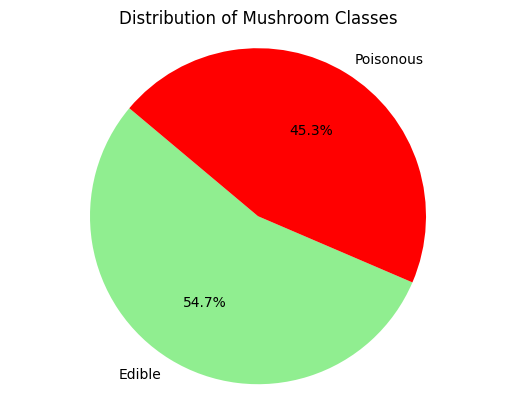

In [9]:
# Count the occurrences of each value in the 'class' column
class_counts = df['class'].value_counts()

# Define labels for each value
labels = ['Edible', 'Poisonous']

# Define colors for each value
colors = ['lightgreen', 'red']

# Create the pie plot
plt.pie(class_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Distribution of Mushroom Classes')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()


* Berdasarkan pie plot, persebaraan data edible berjumlah 54.7% dari total data dan poisonous berjumlah 45.3% dari total data. Dari sini didapati bahwa jamur yang dapat dikonsumsi berjumlah lebih banyak dari jamur beracun pada dataframe ini
* Dari nilai ini juga dapat dianggap bahwa distribusi nilai class pada jamur masih bersifat imabalance ringan, sehingga masih tidak terlalu diperlukannya balancing pada data 

## **Hubungan kolom `class` terhadap semua kolom categorical**
Berdasarkan jumlah unique valuenya, diketahui bahwa kolom `cap_shape`, `gill-attachment`, `gill-color`, `stem-color`, `season`, dan `class` merupakan data ordinal. Pada bagian ini ingin diketahui bagaimana hubungan class terhadap kolom-kolom tersebut

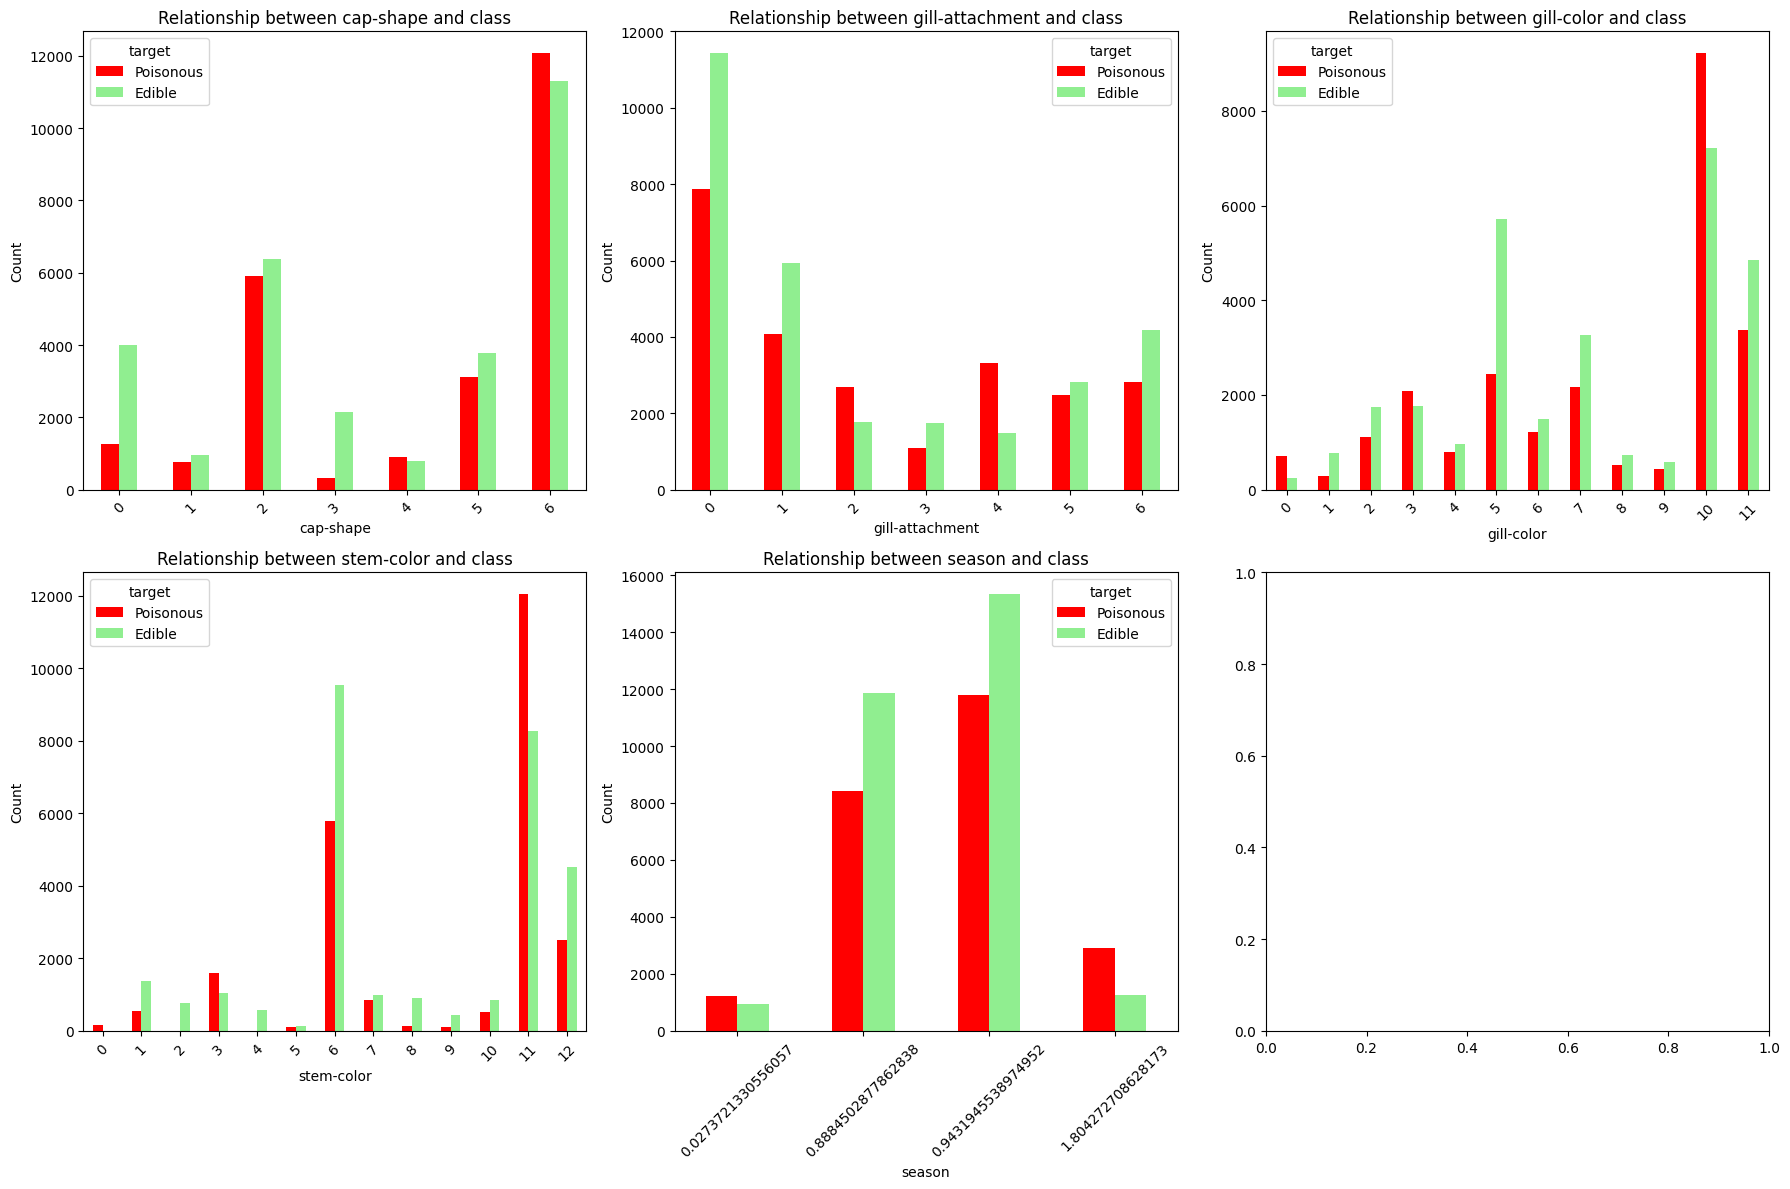

In [10]:
categorical = ['cap-shape', 'gill-attachment', 'gill-color', 'stem-color', 'season']

# Calculate the number of plots needed based on the number of categorical features
num_plots = len(categorical)

# Calculate the number of rows and columns for the subplots
num_rows = (num_plots - 1) // 3 + 1
num_cols = min(num_plots, 3)

# Create a figure and axis array for subplots with larger figsize
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 6 * num_rows))

# Flatten the axes array to simplify iteration
axes = axes.flatten()

for i, x in enumerate(categorical):
    # Crosstab and plot
    cross_table = pd.crosstab(df[x], df['class'])
    cross_table.plot(kind='bar', stacked=False, color=['red', 'lightgreen'], ax=axes[i])

    # Add labels and title
    axes[i].set_xlabel(x)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f"Relationship between {x} and class")
    axes[i].legend(title='target', labels=['Poisonous', 'Edible'])  # Custom legend labels

    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


Berdasarkan hasil dari visualisasi hubungan `class` dengan seluruh kolom kategori didapatkan :
* `cap-shape` : Berdarkan bentuk cap-nya, tiap bentuk jamur membentuk sebuah pola terhadap class-nya dimana rata-rata bentuk jamur memiliki total jamur edible lebih banyak dari pada jamur yang beracun, Kecuali jamur dengan bentuk 6. Jamur bentuk 6 merupakan jamur terbanyak pada data dimana jumlah jamur beracunnya lebih banyak jika dibandingkan dengan jamur yang edible pada bentuk tersebut. 
* `gil-attachment` : pada penhubung gil jamur, terbentuk pola yang sama seperti pada cap-shape. Akan tetapi khusus untuk gill pada tipe 4 jamur beracun lebih banyak ketimbang jamur edible
* `gil-color` : Seluruh warna memiliki jamur edible yang lebih banyak ketimbang jamur poisonous, kecuali pada tiga bentuk warna dimana jamur poisonous lebih banyak. Yaitu pada warna jamur 0, 3, dan 10
* `stem-color` :Pada stem colour ini terdapat dua data yang menarik. Yang pertama adalah stem dengan warna 6, dimana jamur edible memiliki jumlah yang jauh lebih banyak dibandingkan dengan jamur poisonous. Hal yang sama terdapat juga pada jamur dengan warna 11, dimana jumlah jamur poosonous jauh lebih banyak dibandingkan jamur ediblenya
* `season` : Pada season 0.02 dan 1.8 jamur cenderung merupakan jamur beracun, akan tetapi pada 0.8 dan 0.94 jamur edible jauh lebih banyak dibandinkan dengan jamur beracun
* Dari seluruh data ini asumsi sementara adalah bahwa `cap-shape`, `gil-attachment`, `gil-color`, `stem-color`, `season` memiliki korelasi dengan `class` dimana tiap fitur tersebut memiliki sebuah pola terhadap `class`. Untuk korelasi yang lebih tepat sendiri harus dilakukan uji korelasi pada saat proses data engineering nanti agar fitur yang digunakan lebih akurat dalam menghasilkan prediksi pada model

## **Hubugan `stem-height` terhadap `stem-width`**

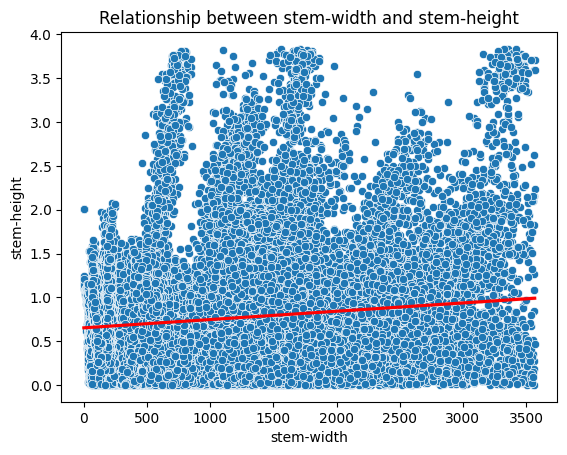

In [11]:
numerical = ['stem-height', 'stem-width']

sns.scatterplot(x='stem-width', y='stem-height', data=df)
plt.xlabel('stem-width')
plt.ylabel('stem-height')
plt.title("Relationship between stem-width and stem-height")

# Adding regression line
sns.regplot(x='stem-width', y='stem-height', data=df, scatter=False, color='red')

plt.show()


* Berdasarkan garis regresi yang terbentuk, stem-width dan stem-height memiliki hubungan linear yang lemah, hal ini dapat terjadi karena jika sebuah jamur itu sehat jamur tersebut dapat memiliki panjang dan lebar batang yang panjang dan besar

## **Hubugan `stem-height` terhadap `cap-diameter`**

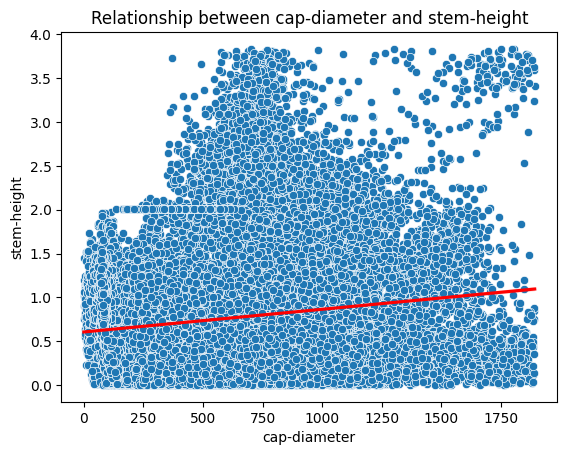

In [12]:
numerical = ['stem-height', 'cap-diameter']

sns.scatterplot(x='cap-diameter', y='stem-height', data=df)
plt.xlabel('cap-diameter')
plt.ylabel('stem-height')
plt.title("Relationship between cap-diameter and stem-height")

# Adding regression line
sns.regplot(x='cap-diameter', y='stem-height', data=df, scatter=False, color='red')

plt.show()


* Berdasarkan garis regresi yang terbentuk, `cap-diameter` dan `stem-height` memiliki hubungan linear yang lemah, menunjukkan bahwa diameter dari topi jamur akan semakin besar ketika tinggi batang jamur semakin tinggi juga 

## **Hubungan seluruh fitur dan target pada dataframe** 

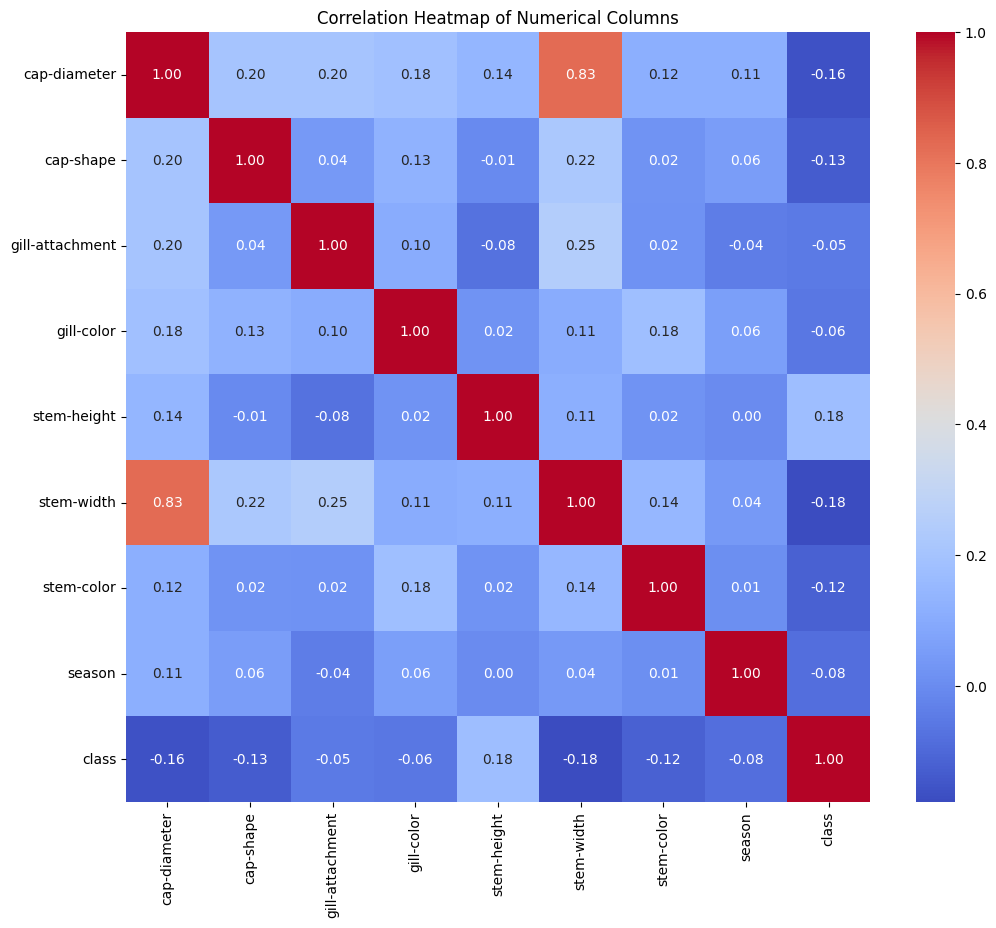

In [13]:
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Heatmap of Numerical Columns')

# Show plot
plt.show()

* Rata-rata fitur memiliki hubungan yang lemah dengan fitur lainnya, akan tetapi terdapat korelasi yang kuat yaitu pada `stem-width` dan `cap-diameter`. korelasi ini menunjukkan bahwa panjang dari batang pada jamur memiliki pengaruh terhadap diameter topi dari jamur itu tersendiri

# **vi. Feature Engineering** 
Setelah pengecekan dari data loading dan insight dari EDA, data sudah siap di proses untuk dipersiapkan masuk ke dalam permodelan. Proses ini meliputi proses splitting, pengecekan kardinal, pengecekan outlier, pengecekan missing value, seleksi fitur, scalling, dan juga encoding. 

## **Cardinality**
Pengecekan jumlah value tiap kolom, apabila tiap kolom memiliki value yang terlalu banyak, maka handling akan dilakukan

In [14]:
df.nunique()

cap-diameter       1847
cap-shape             7
gill-attachment       7
gill-color           12
stem-height        1455
stem-width         3510
stem-color           13
season                4
class                 2
dtype: int64

* Tiap kolom ordinal sudah memiliki nilai unique yang sedikit, proses dapat dilanjutkan 

## **Splitting Between Train-set and Test-set**
Pembagian data menjadi nilai X (fitur) dan y (target) yang dibagi lagi menjadi train-set dan test-set per variabel X dan y

In [15]:
#Split antara X (fitur) & y (target)
X = df.drop('class', axis = 1)
y = df['class']
# Melihat isi variabel x
X

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
0,1372,2,2,10,3.807467,1545,11,1.804273
1,1461,2,2,10,3.807467,1557,11,1.804273
2,1371,2,2,10,3.612496,1566,11,1.804273
3,1261,6,2,10,3.787572,1566,11,1.804273
4,1305,6,2,10,3.711971,1464,11,0.943195
...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195
54031,82,2,3,2,1.186164,490,12,0.943195
54032,82,5,3,2,0.915593,584,12,0.888450
54033,79,2,3,2,1.034963,491,12,0.888450


* fitur dan target telah berhasil dipisahkan

Proses dilanjutkan pemisahan train dan test untuk tiap x dan y. Dari data ini, 20% akan digunakan menjadi data test dan 80% digunakan sebagai data train

In [16]:
# Split train dan test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('Train_size: ' , X_train.shape)
print('Test_size: ', X_test.shape)  

Train_size:  (42985, 8)
Test_size:  (10747, 8)


* Spltting dilakukan dengan pembagian data sebanyak 80% untuk data train dan 20% data untuk data test
* X train memiliki 50 kolom dengan jumlah data perkolom sebanyak 42985
* X test memiliki 50 kolom dengan jumlah data perkolom sebanyak 10747
* X train dan X test berhasil terbentuk

## **Handling Missing Value** 
Pengecekan dan pengubahan nilai null pada data

In [17]:
# Mengecek missing value pada X_train
X_train.isna().sum().sort_values(ascending=False)

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
dtype: int64

In [18]:
X_test.isna().sum().sort_values(ascending=False)

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
dtype: int64

In [19]:
# Mengecek missing value pada y
print('null pada y_train :',y_train.isna().sum())
print('null pada y_test :',y_test.isna().sum())

null pada y_train : 0
null pada y_test : 0


* Tidak terdapat missing value pada semua variabel
* Proses akan dilanjutkan ke handling dari outlier 

## **Handling Outlier** 
Proses pengecekan, penghapusan, atau pengubahan outlier  pada nilai - nilai di dalam dataframe 

### **Checking Outlier** 
Penyekan outlier menggunakan nilai skew tiap data

In [20]:

def check_skew(df):
    # Menfilter kolom numerik
    numerical_columns = df.select_dtypes(include=np.number).columns.tolist()

    # Membuat list untuk kolom dengan distribusi normal, skew, highly skew, dan keseluruhannya  
    normal_columns = []
    skewed_columns = []
    highly_skewed_columns = []
    all_columns = []

    # Iterasi kolom numerik untuk mengetahui distirbusi tiap kolom
    for column in numerical_columns:
        skewness = df[column].skew()

        # Jika data distribusi normal
        if -0.5 <= skewness <= 0.5:
            normal_columns.append([column, skewness])
            all_columns.append([column,skewness,'Normal'])

        # Jika data skew
        elif -1 <= skewness < -0.5 or 0.5 > skewness >= 1 :
            skewed_columns.append([column, skewness,])
            all_columns.append([column,skewness,'SKEWED'])


        elif skewness <= -1 or skewness >= 1:
            highly_skewed_columns.append([column, skewness])
            all_columns.append([column,skewness,'HIHGLY SKEWED'])


    # Membuat dataframe dari list 
    normal_df = pd.DataFrame(normal_columns, columns=['Column', 'Skewness'])
    skewed_df = pd.DataFrame(skewed_columns, columns=['Column', 'Skewness'])
    highly_skewed_df = pd.DataFrame(highly_skewed_columns, columns=['Column', 'Skewness'])
    all_skewed_df = pd.DataFrame(all_columns, columns=['Column', 'Skewness', 'Distribution'])


    return normal_df, skewed_df, highly_skewed_df, all_skewed_df



In [21]:
normal_df, skewed_df, highly_skewed_df, all_skewed_df = check_skew(X_train)

print("Normal Distribution:")
print(normal_df)

print("\nSkewed Distribution:")
print(skewed_df)

print("\nhighly Skewed Distribution:")
print(highly_skewed_df)

Normal Distribution:
       Column  Skewness
0  gill-color -0.486478

Skewed Distribution:
       Column  Skewness
0   cap-shape -0.538570
1  stem-color -0.641716

highly Skewed Distribution:
        Column  Skewness
0  stem-height  1.503082


In [22]:
all_skewed_df

,Column,Skewness,Distribution
0,cap-shape,-0.538570,SKEWED
1,gill-color,-0.486478,Normal
2,stem-height,1.503082,HIHGLY SKEWED
3,stem-color,-0.641716,SKEWED


* Data memiliki distribusi normal untuk kolom `gill-color`
* Data memiliki distribusi highly skew pada kolom `cap-shape`, `gill-color`, `stem-height	`, `stem-color`
* Distribusi skewness cenderung memiliki nilai outlier didalamanya. Bahkan, data berdstribusi normal pun juga dapat memiliki nilai outlier didalamnya. Oleh karena itu perlunya handling dari nilai outlier ini.

In [23]:
# Fungsi visualisasi histogram dan boxplot tiap kolom numerik
def diagnostic_plots(dataframe):
    # memilih kolom numerik
    numerical_columns = dataframe.select_dtypes(include='number').columns
    
    # iterasi tiap kolom numerik
    for column in numerical_columns:
        # Define figure size
        plt.figure(figsize=(16, 4))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(dataframe[column], bins=30)
        plt.title(f'Histogram of {column}')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=dataframe[column])
        plt.title(f'Boxplot of {column}')

        plt.show()

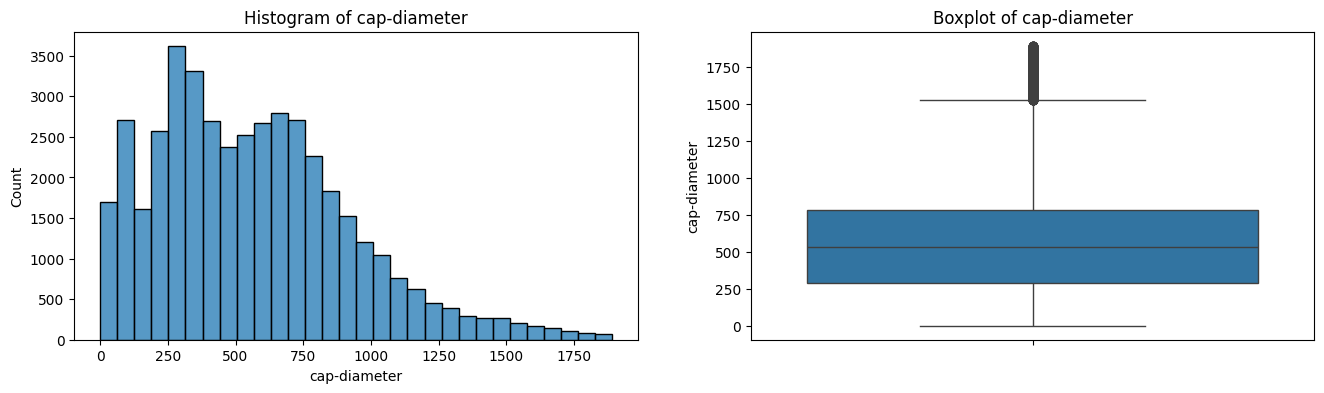

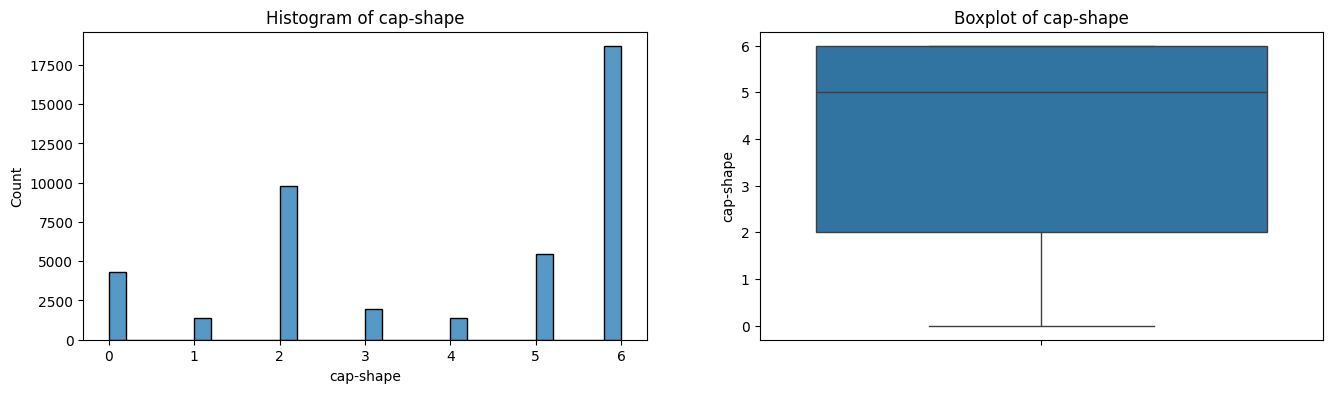

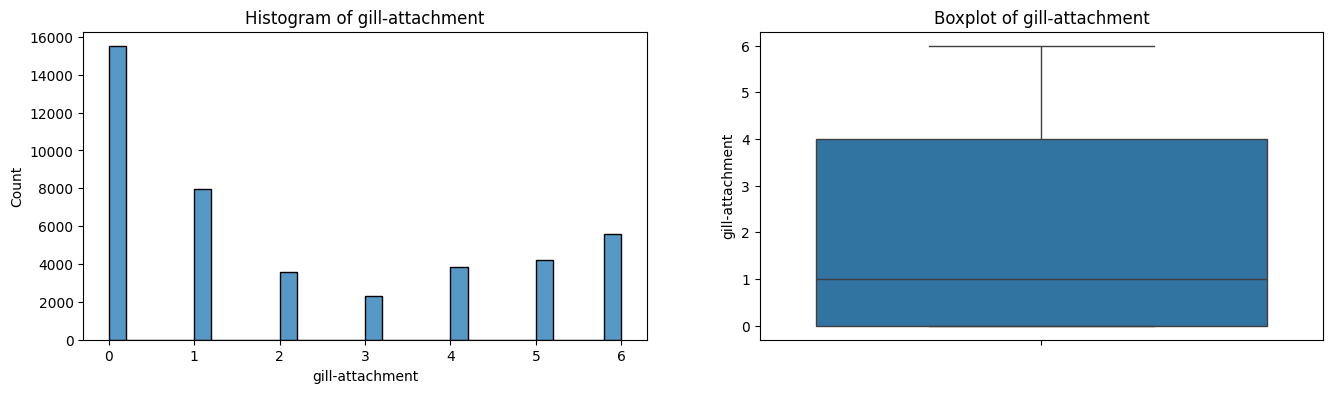

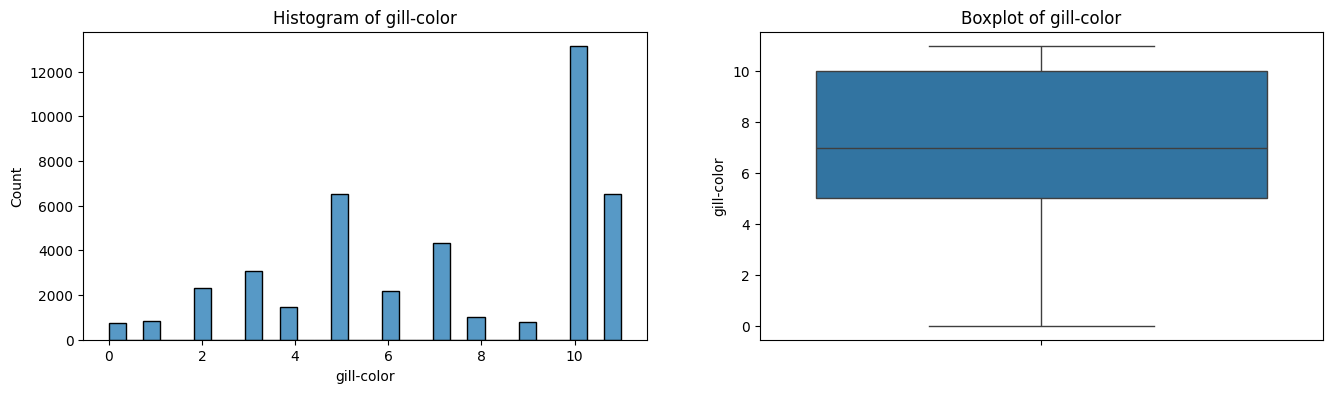

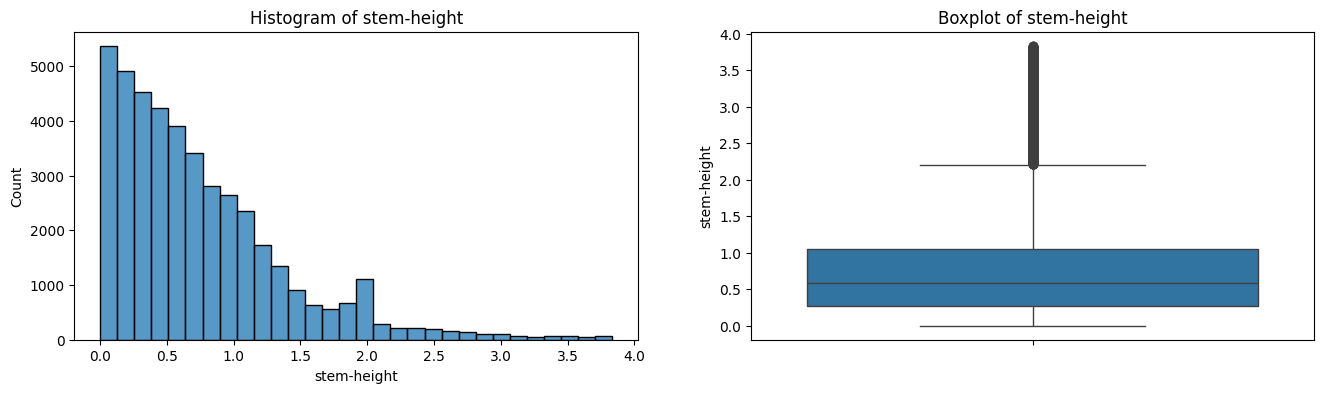

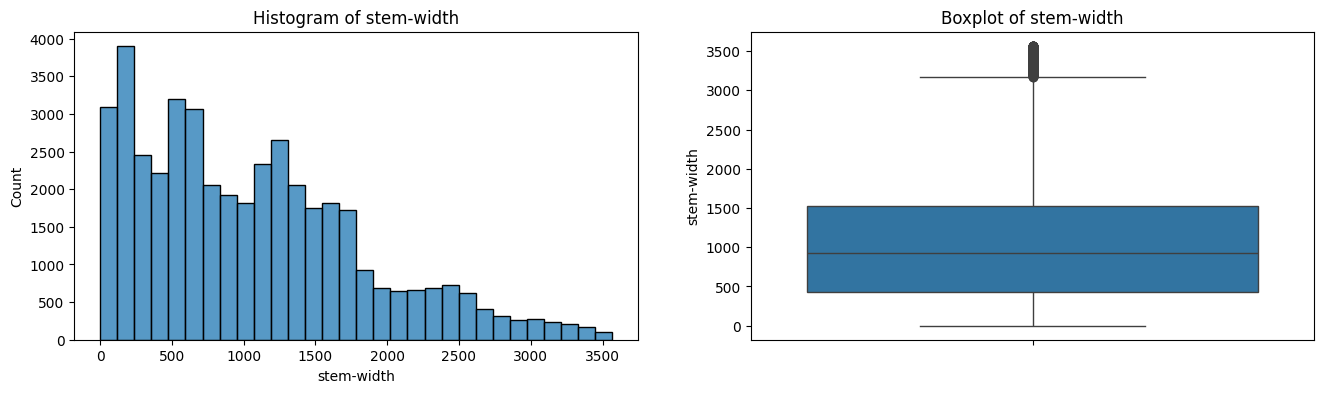

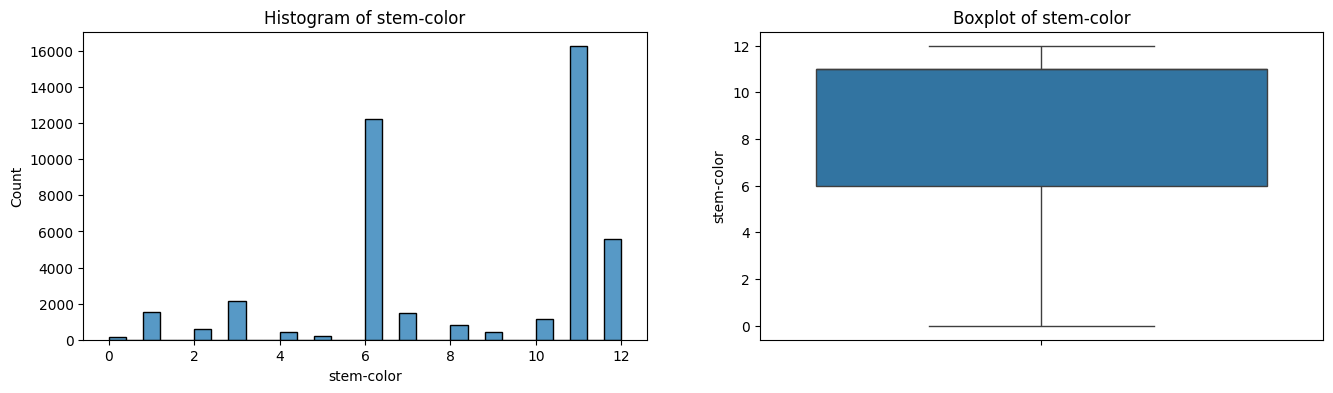

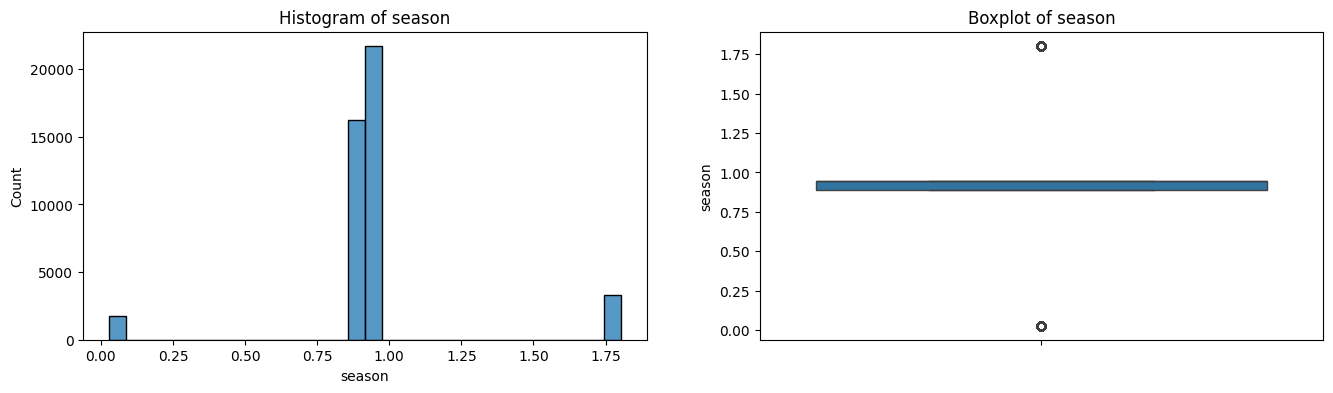

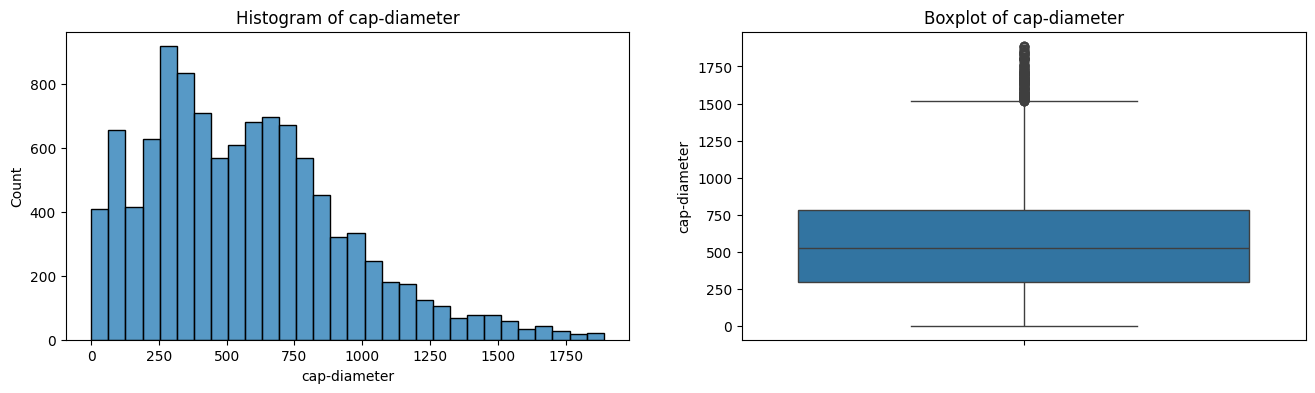

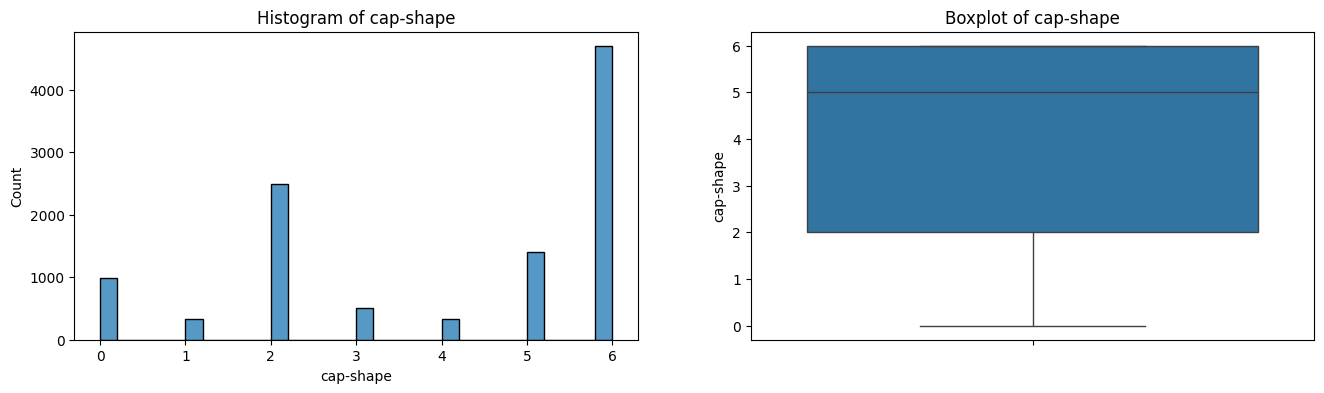

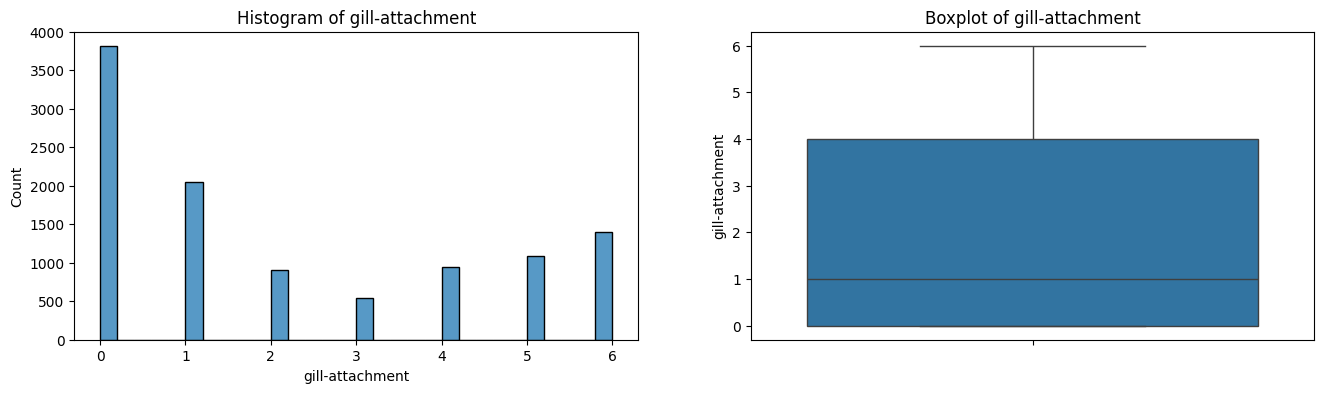

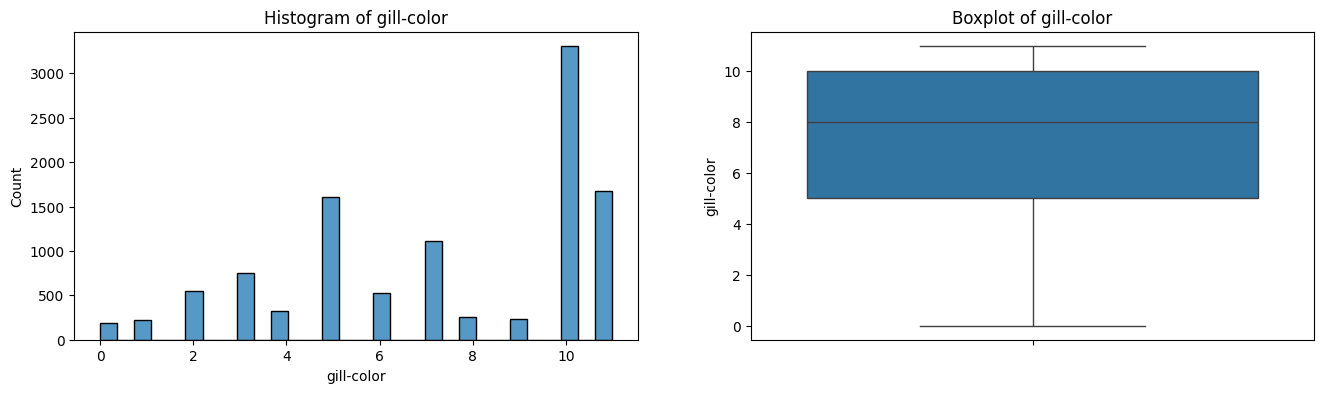

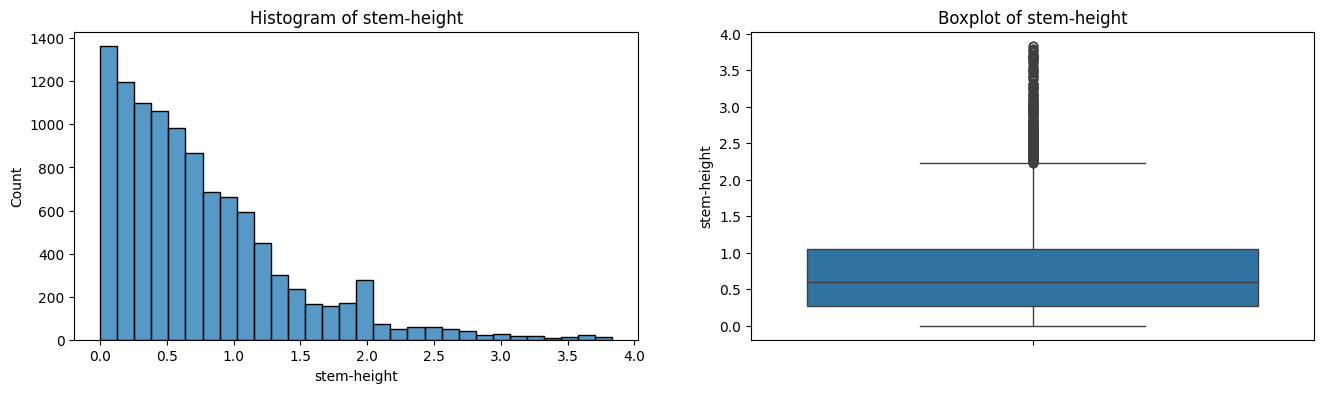

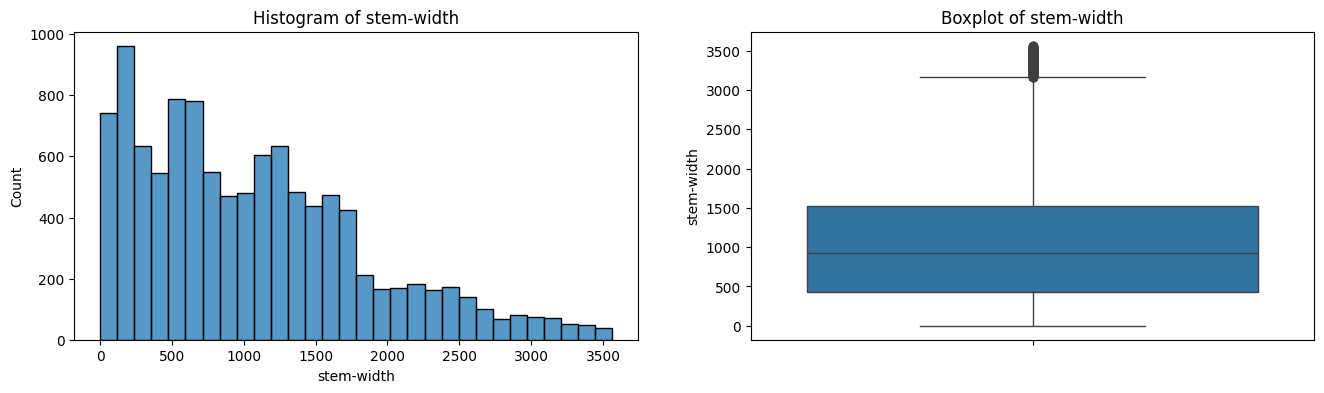

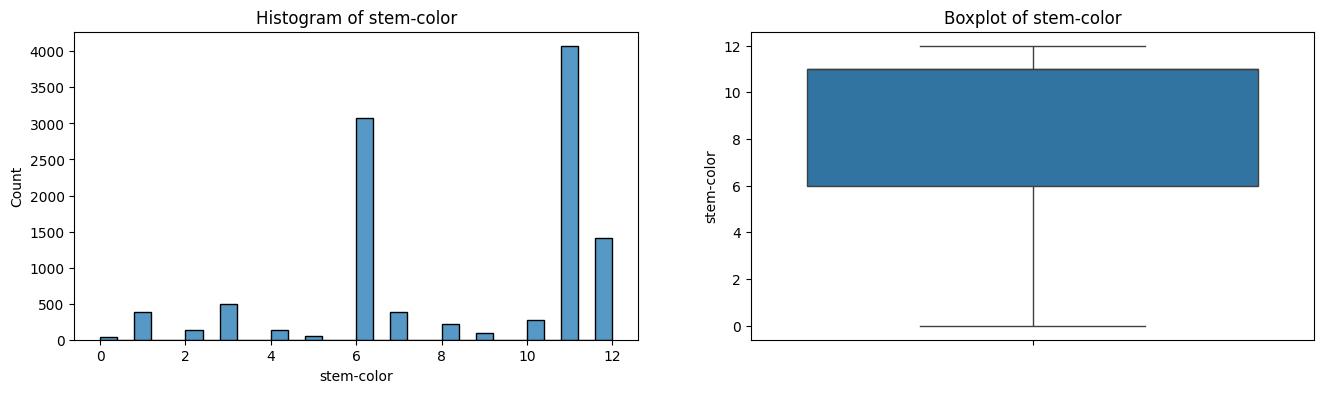

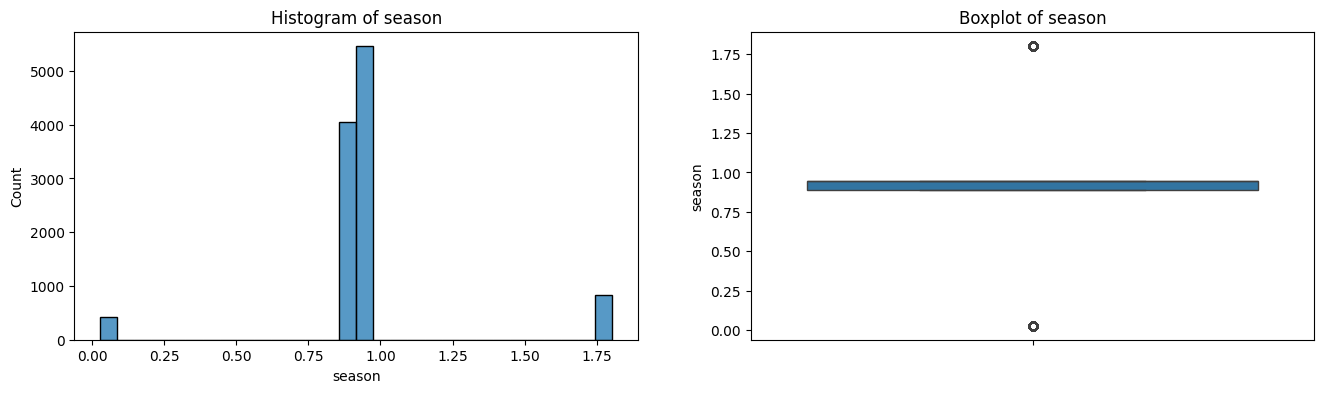

In [24]:
# Fungsi untuk X_train
diagnostic_plots(X_train)

# Fungsi untuk X_test
diagnostic_plots(X_test)

### *Capping* Outlier 
Metode pengubahan nilai outlier sehingga memiliki batasan tertentu, metode *capping* ini digunakan karena kelebihannya yaitu tidak mengurangi jumlah dari data

In [25]:
# Pembuatan variabel kolom skew dan kolom normal untuk mempermudah capping
kolom_skew = skewed_df['Column'].tolist() + highly_skewed_df['Column'].tolist()
kolom_normal = normal_df['Column'].tolist()

#### **Normal distribution capping**
Metode capping untuk distribusi normal. Capping normal distribution menggunakan metode Gaussian 

In [26]:
# Capping untuk data dengan distribusi normal 
winsoriser_normal = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=kolom_normal)

X_train_capped = winsoriser_normal.fit_transform(X_train)
X_test_capped = winsoriser_normal.transform(X_test)

#### **Skew distribution capping** 
Metode capping untuk distribusi normal. Capping normal distribution menggunakan metode IQR 

In [27]:
# Capping untuk data dengan distribusi skewed
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables = kolom_skew)

# Fit & Transforming X_train 
X_train_capped = winsorizer_skewed.fit_transform(X_train_capped)

# Transforming X_test
X_test_capped = winsorizer_skewed.transform(X_test_capped)

### **Visualisasi sebelum dan sesudah *capping***

#### **Visualisasi perbandingan distibusi normal** 

In [28]:
# Plot Komparasi distribusi
def outlier_handling_plot_comparison(df_before, df_after, variable):
    # Ukuran dan title 
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0], color='lightgreen')
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='skyblue')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1], color='lightgreen')
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

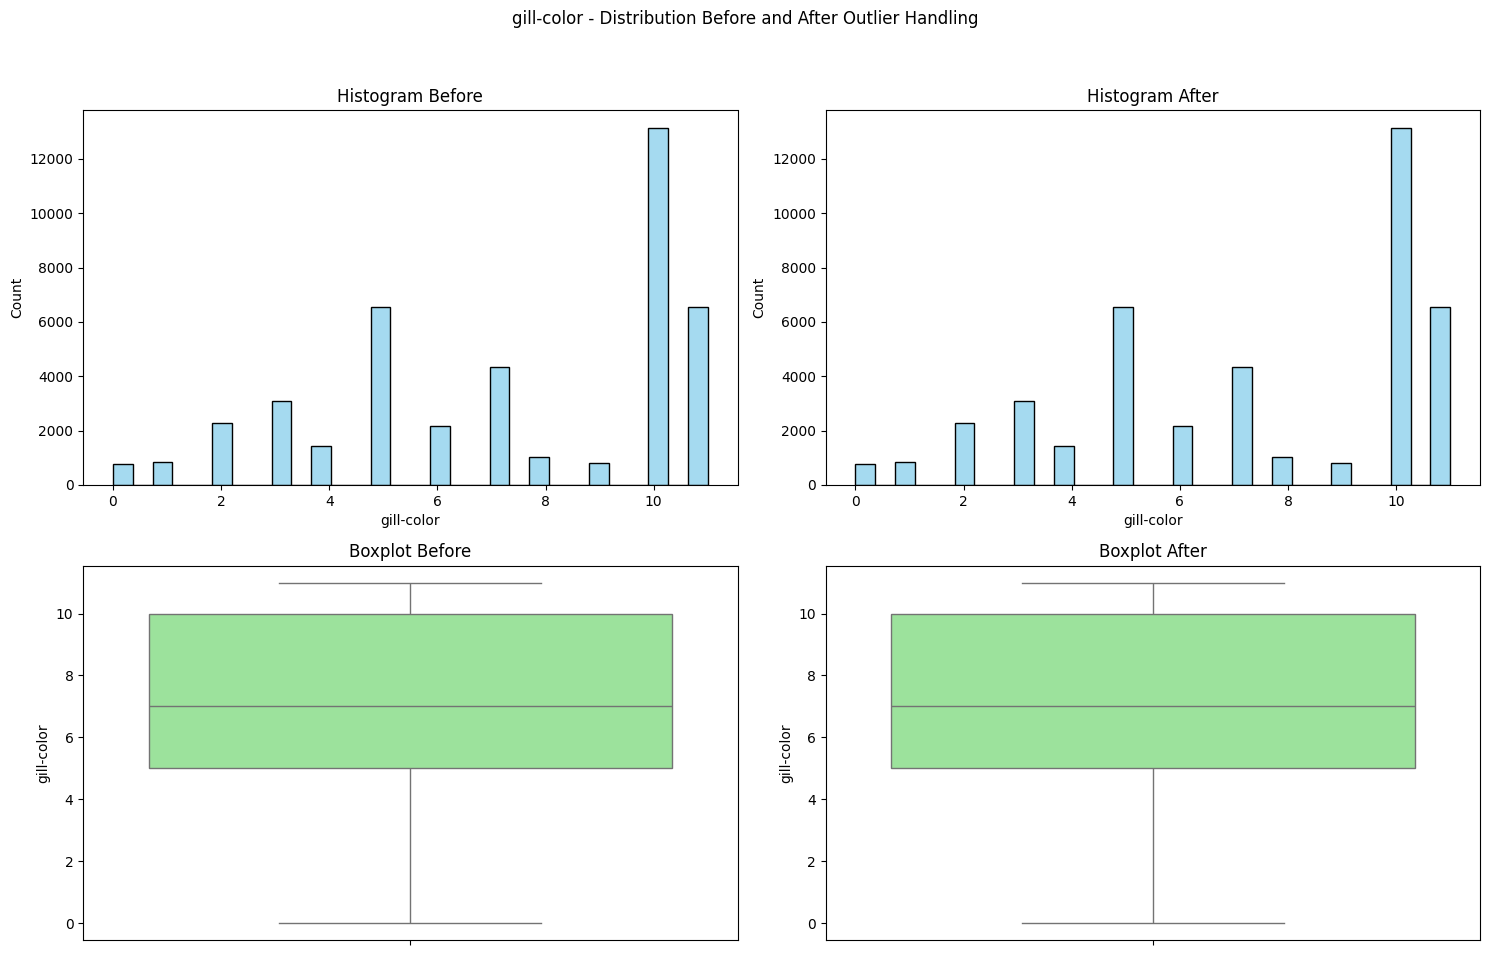

In [29]:
# Pengelompokkan data x_train yang berdistribusi normal
X_train_normal = X_train[kolom_normal]
# Menggunakan fungsi looping
for col in X_train_normal.select_dtypes(include=np.number).columns.to_list():
    outlier_handling_plot_comparison(X_train_normal, X_train_capped, col)



* Tidak terdapat perubahan didalamnya karena keduanya berupa distribusi normal yang didalamnya tidak terdapat outlier 

#### **Visualisasi perbandingan distibusi skew** 

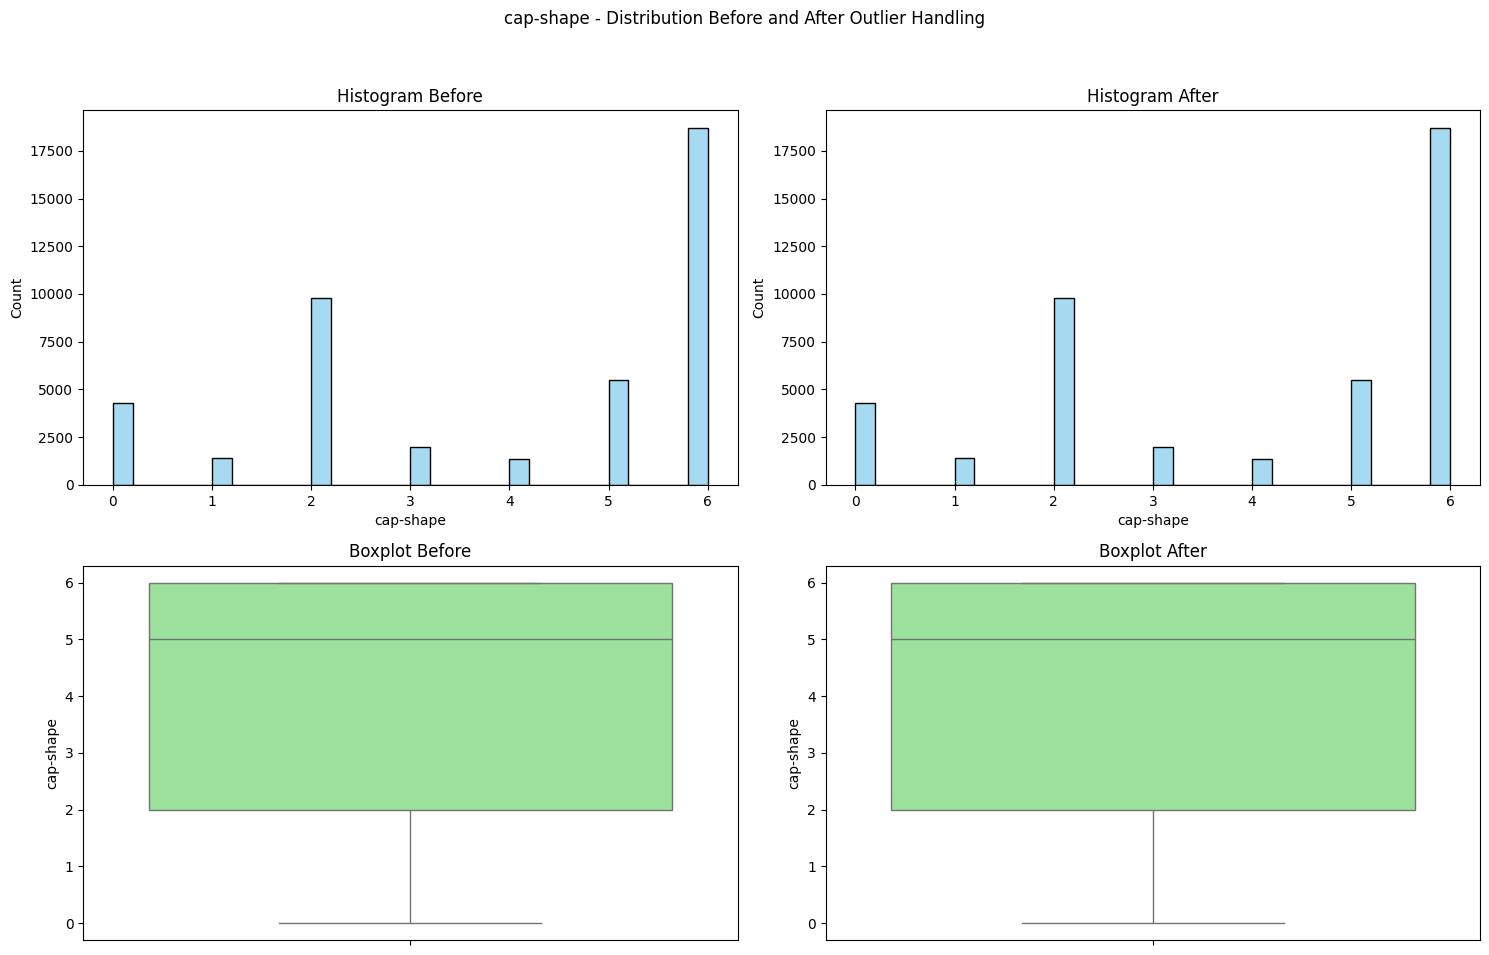

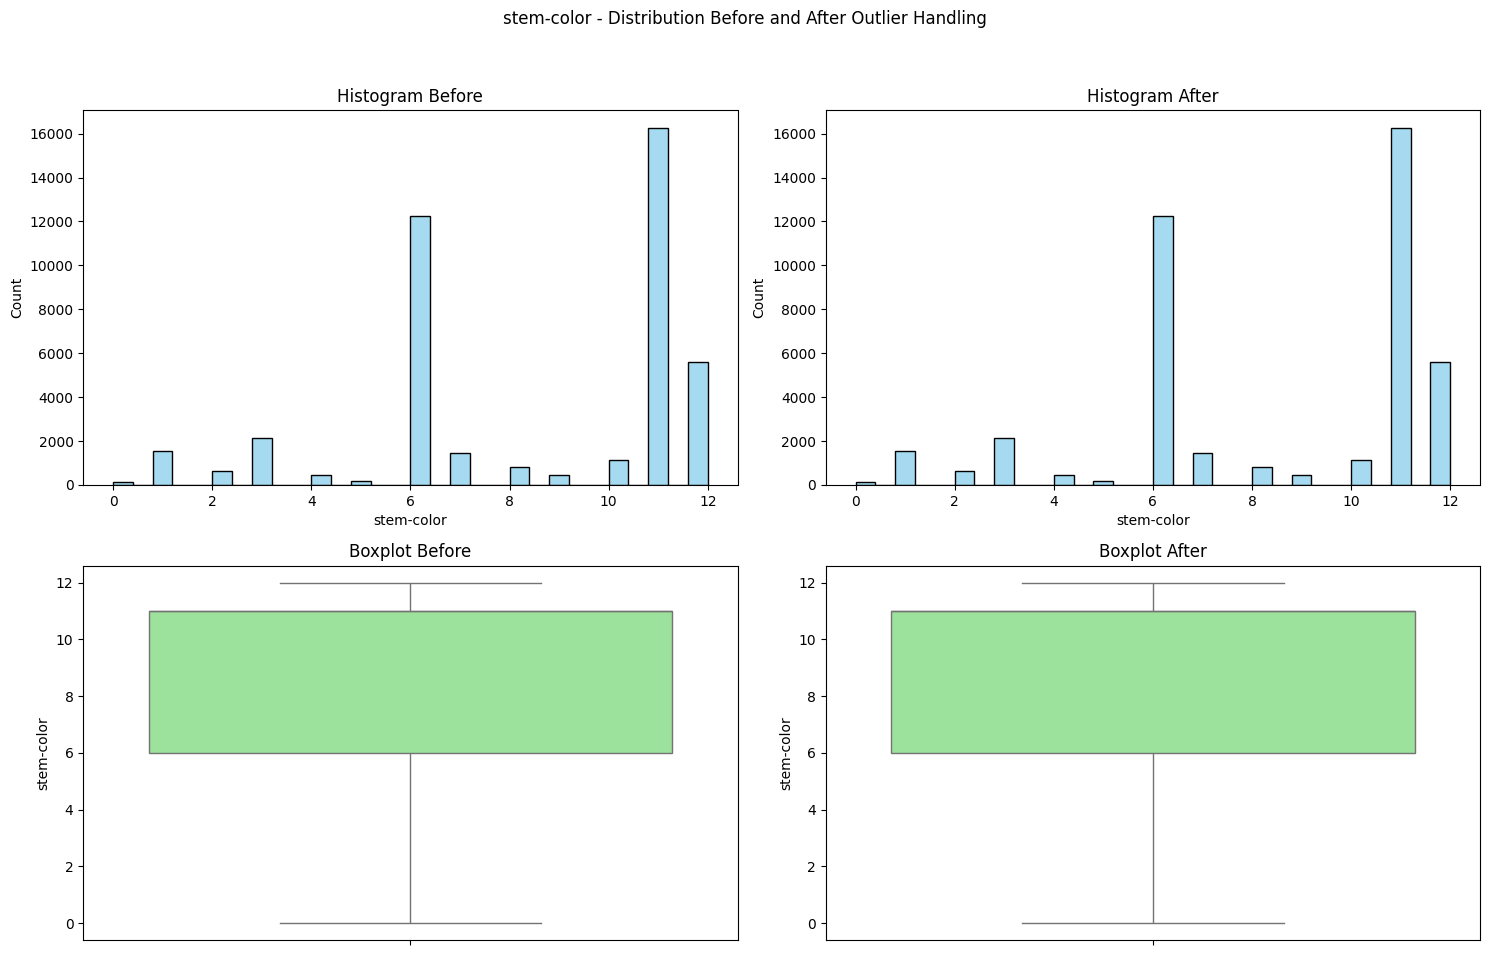

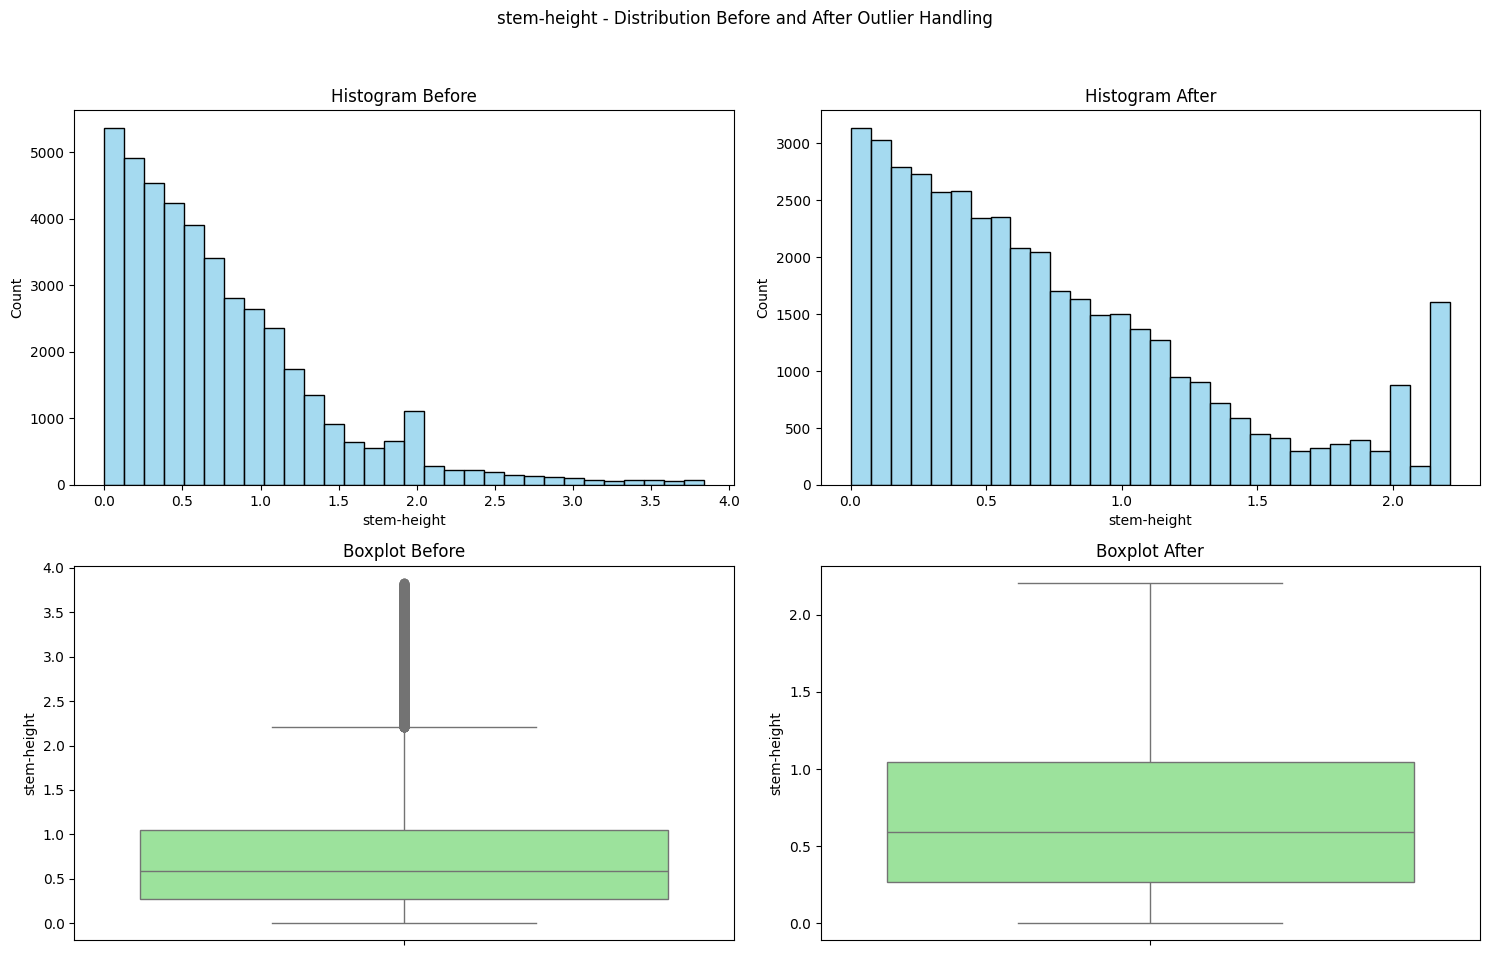

In [30]:
# Pengelompokkan data x_train yang berdistribusi skew
X_train_skew = X_train[kolom_skew]
# Menggunakan fungsi looping
for col in X_train_skew.select_dtypes(include=np.number).columns.to_list():
    outlier_handling_plot_comparison(X_train_skew, X_train_capped, col)


* Dari hasil visual, nilai outlier dari seluruh kolom berdistibusi skew sudah hilang. Artinya metode *capping* telah berhasil dilakukan
* Proses akan dilanjutkan proses splitting

## **Splitting Numerical and Categorical**
Pemisahan data numerical dan categorical 

In [31]:
# Pengelompokkan untuk kolom numerikal dan kolom categorical
cat_columns = ['cap-shape', 'gill-attachment', 'gill-color', 'stem-color', 'season']

num_columns = [col for col in X_train_capped.columns if col not in cat_columns]


print('Categorical Columns: ', cat_columns)
print('Numcerical Columns: ', num_columns)

Categorical Columns:  ['cap-shape', 'gill-attachment', 'gill-color', 'stem-color', 'season']
Numcerical Columns:  ['cap-diameter', 'stem-height', 'stem-width']


In [32]:
# Pengelompokkan categorical dan numerical pada data X_train dan X_test yang telah di capping 
X_train_num = X_train_capped[num_columns]
X_train_cat = X_train_capped[cat_columns]

X_test_num = X_test_capped[num_columns]
X_test_cat = X_test_capped[cat_columns]

* X train dan test sudah dikategorikan berdasarkan jenisnya  
* Proses dilanjuatkan ke feature selection

## **Feature Selection**
Pengambilan fitur yang memiliki hubungan terhadap target menggunakan uji korelasi 

### **Numerical features**
Pengujian korelasi untuk data numerikal akan menggunakan metode pearson dan spearman. Metode pearson akan digunakan untuk data yang memiliki distribusi normal dan metode spearman akan digunakan pada data yang memiliki distribusi skew. Dibawah ini adalah fungsi uji korelasi untuk kolom data numerikal:

In [33]:
# Pengujian korelasi menggunakan metode pearson dan spearman
def korelasi_pearson_spearman(X_train_num,y_train) :

  p_values = []
  Korelasi = []
  cols = []
  corr = []

  for col in X_train_num.columns:
    if abs(X_train_num[col].skew()) < 0.5:                    #Untuk kolom yang terdistribusi normal
      corr_coef, p_value = pearsonr(X_train_num[col], y_train)

      p_values.append(p_value)
      cols.append(col)
      corr.append(corr_coef)

      if p_value < 0.05:
        Korelasi.append('Korelasi signifikan')
      else :
        Korelasi.append('Tidak ada Korelasi yang signifikan')
    else:                                                     #Untuk kolom yang tidak terdistribusi normal
      corr_coef, p_value = spearmanr(X_train_num[col], y_train)

      p_values.append(p_value)
      cols.append(col)
      corr.append(corr_coef)

      if p_value < 0.05:
        Korelasi.append('Korelasi signifikan')
      else :
        Korelasi.append('Tidak ada korelasi yang signifikan')

  return pd.DataFrame({'Column Name':cols,
                'Correlation Coefficient' : corr,
                'P-value':p_values,
                'Korelasi': Korelasi })

In [34]:
# Menampilkan hasil uji korelasi
korelasi_pearson_spearman(X_train_num,y_train)

,Column Name,Correlation Coefficient,P-value,Korelasi
0,cap-diameter,-0.187301,0.0,Korelasi signifikan
1,stem-height,0.194263,0.0,Korelasi signifikan
2,stem-width,-0.226967,0.0,Korelasi signifikan


* Didapati bahwa pada kolom *numerical* kolom `cap-diameter`, `stem-height`, `stem-width` memiliki korelasi yang signifikan. Fitur - fitur ini akan dimasukkan kedalam model.

### **Categorical Feature**
Pengujian korelasi 'price' terhadap kolom categorical. Pengujian akan dilakukan dengan metode kendall. Metode ini digunakan karena pengujian akan dilakukan kepada data categorical terhadap data numerical. 

In [35]:
def korelas_kendall(X_train_cat,y_train):
#Finding the correlation between categorical columns and 'price' using Kendall Tau's correlation

    p_values = []
    Korelasi = []
    cols = []
    corr = []


    for col in X_train_cat.columns:
        corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

        p_values.append(p_value)
        cols.append(col)
        corr.append(corr_coef)

        if p_value < 0.05:
            Korelasi.append('Korelasi signifikan')
        else :
            Korelasi.append('Tidak ada korelasi yang signifikan')

    return pd.DataFrame({'Column Name':cols,
                'Correlation Coefficient' : corr,
                'P-value':p_values,
                'Korelasi': Korelasi })

In [36]:
korelas_kendall(X_train_cat,y_train)


,Column Name,Correlation Coefficient,P-value,Korelasi
0,cap-shape,-0.115624,2.525772e-153,Korelasi signifikan
1,gill-attachment,-0.054094,2.448016e-36,Korelasi signifikan
2,gill-color,-0.047461,2.705966e-29,Korelasi signifikan
3,stem-color,-0.087388,1.500571e-89,Korelasi signifikan
4,season,-0.065338,1.603678e-45,Korelasi signifikan


* Dari hasil korelasi kendall didapati bahwa kolom `cap-shape`, `pgill-attachment`, `gill-color`, `stem-color`, `season	` dan `pay_6` memiliki korelasi yang signifikan. Fitur-fitur ini akan dimasukkan ke dalam permodelan.

### **Variabel untuk fitur terkorelasi**


In [37]:
# Pembuatan variabel baru untuk categorical dan numerical yang memiliki korelasi saja
selected_cat_col = ['cap-shape', 'gill-attachment', 'gill-color', 'stem-color', 'season']
selected_num_col = ['cap-diameter', 'stem-height', 'stem-width']

* Berdasarkan tipe data, semua kolom termasuk kedalam tipe numerikal. Akan tetapi, beberapa dari kolom tersebut merupakan data Ordinal. Oleh karena itu pemilihan data categorical dipilih secara manual seperti pada diatas ini.

In [38]:
# Memasukkan variabel ke dalam variabel X_train dan X_test yang dikelompokkan berdasarkan cat dan num
X_train_cat = X_train_cat[selected_cat_col]
X_train_num = X_train_num[selected_num_col]

X_test_cat = X_test_cat[selected_cat_col]
X_test_num = X_test_num[selected_num_col]

In [39]:
X_train_cat.head(5)

,cap-shape,gill-attachment,gill-color,stem-color,season
19828,0,0,8,12,0.888450
37172,1,0,8,11,0.888450
48651,5,3,2,12,0.888450
28473,5,1,7,3,0.943195
16453,2,5,10,11,0.888450


In [40]:
X_train_num.head(5)

,cap-diameter,stem-height,stem-width
19828,249,0.274976,531
37172,446,0.023448,672
48651,466,0.143669,1639
28473,280,0.760413,584
16453,790,0.409410,2955


In [41]:
X_test_cat.head(5)

,cap-shape,gill-attachment,gill-color,stem-color,season
7340,2,6,7,6,0.888450
10818,1,0,10,6,0.943195
52522,3,3,2,11,0.888450
32081,6,5,7,6,0.888450
19434,6,0,1,7,0.888450


In [42]:
X_test_num.head(5)

,cap-diameter,stem-height,stem-width
7340,331,0.624276,364
10818,48,0.406283,49
52522,409,0.127753,3282
32081,1642,0.369620,1677
19434,378,0.442093,602


* Fitur sudah terbagi menjadi categorical dan numerical untuk tiap X

# **vii. Pipeline**
Proses gabungan dari scaling, encoding, modelling, tuning, dan juga evaluasi dari algoritma yang akan dicoba. Pada bagian ini akan dilakukan tahap-tahap tersebut dengan penjelasan sebagai berikut :
* `Scaling` : 
    * Proses scaling akan dilakukan menggunakan standardscaler. Metode scalling ini digunakan karena metode ini bagus digunakan untuk fitur-fitur yang memiliki distribusi normal dan juga distribusi tidak normal seperti yang terdapat pada dataframe jamur yang digunakan.
* `encoding` : 
    * encoding sudah dilakukan pada awal data didapatkan. Berdasarkan keterangan pemilik data, dataframe telah diberikan encoding dengan metode onehotencoder. OneHotencoder ini digunakan karena data categorical pada data jamur ini tidak memiliki urutan sehingga tidak perlu dilakukan encoding ordinal. Untuk proses encoding pada pipeline sendiri tidak akan dilakukan lagi karena seluruh nilai sudah berbentuk angka
* `modelling` : 
    * Pada program ini akan dilakukan beberapa pengujian model algoritma sebagai berikut :
        1. KNN
        2. SVM
        3. Desicion Tree 
        4. Random Forest 
        5. Boosting 
*  `Evaluasi`:
    * Proses evaluasi akan dilakukan menggunakan cross-validation, dimana metric yang akan diamati adalah metric recall. Pada data ini, data yang didapatkan tidak boleh false negative, dimana jamur yang seharusnya beracun malah dianggap jamur yang tidak beracun. Kesalahan nilai negatif ini dapat berdampak sangat fatal sehingga nilai dari false negative ini harus dikurangi dengan melihat nilai dari recall. Dari cross-validation berikut hal yang akan diperhatikan :
        * mean CV = dikarenakan yang diamati adalah recall maka semakin tinggi mean CV maka akan semakin baik model tersebut
        * Std CV = semakin rendah std menunjukkan model semakin konsisten dalam menghadapi data yang menunjukkan bahwa model semakin baik 

Proses selanjutnya adalah proses pipeline dari tiap algoritma
    


## **KNN Modelling**
KNN merupakan sebuah algoritma yang sederhana dan mudah dipahami, cocok sebagai baseline dalam pemodelan, non-parametrik sehingga tidak terbatas pada distribusi tertentu, dan dapat digunakan tanpa proses pelatihan, membuat algoritma ini cepat dan cocok untuk pembaruan data teratur. Model ini memiliki beberapa hyperparameter sebagai berikut :
* n_neighbors = Jumlah n-neighbour
* p = jarak antar poin data 
* weights = berat tiap neighbour untuk membuat prediksi

Berikut permodelannya :

In [123]:
# MODEL KNN
# Define preprocessing pipelines
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline('passthrough')

# Define preprocessing column transformer
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, selected_num_col),
    ('cat', cat_pipeline, selected_cat_col)
])

# Define model pipeline
model_pipeline_KNN = make_pipeline(preprocessing_pipeline, KNeighborsClassifier())

# Fit the model on the entire training data
model_pipeline_KNN.fit(X_train_capped, y_train)

# Evaluate model using cross-validation on training set
cv_results_train = cross_val_score(model_pipeline_KNN, X_train_capped, y_train, cv=10, scoring='recall')
mean_cv_recall_train = np.mean(cv_results_train)
std_cv_recall_train = np.std(cv_results_train)

# Evaluate model using cross-validation on test set
cv_results_test = cross_val_score(model_pipeline_KNN, X_test_capped, y_test, cv=10, scoring='recall')
mean_cv_recall_test = np.mean(cv_results_test)
std_cv_recall_test = np.std(cv_results_test)

# Evaluate model on test set
recall_score_train = model_pipeline_KNN.score(X_train_capped, y_train)
recall_score_test = model_pipeline_KNN.score(X_test_capped, y_test)

# Create a DataFrame to hold the evaluation results
evaluation_results = pd.DataFrame({
    'Dataset': ['Training', 'Test'],
    'Recall Score': [recall_score_train, recall_score_test],
    'Mean CV Recall': [mean_cv_recall_train, mean_cv_recall_test],
    'Std CV Recall': [std_cv_recall_train, std_cv_recall_test]
})

# Print the DataFrame
evaluation_results


,Dataset,Recall Score,Mean CV Recall,Std CV Recall
0,Training,0.992625,0.991840,0.001837
1,Test,0.990044,0.985244,0.005022


* Berdasarkan hasil model ini memiliki nilai fitting yang baik antara train set dan test set dimana perbedaan recall dari keduanya hanya bernilai 0.002 saja
* Dari nilai recallnya algoritma KNN ini memiliki nilai yang sangat baik yaitu `0.990044`. Nilai ini menunjukkan bahwa nilai true positif yang sebenarnya sudah masuk sebanyak 99% dengan false negative yang hampir tidak ada
* STD dari model KNN ini menujukkan nilai yang sangat kecil, dimana hanya bernilai `0.005022` yang artinya performa model konsisten ketika menghadapi berbagai nilai data 

## **SVM Modelling**
SVM adalah sebuah logaritma yang efektif dalam ruang fitur berdimensi tinggi dan menangani data yang tidak linier dengan baik menggunakan fungsi kernel, serta memiliki parameter penalti yang dapat disesuaikan untuk fleksibilitas dalam menangani data yang bervariasi. Algoritma ini memiliki beberapa hyperparameter seperti:
*  C = invers dari kekuatan regulasi
* Kernel = Kernel yang digunakan pada SVC

Berikut permodelannya :

In [114]:
# Model SVM
# Define preprocessing pipelines
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline('passthrough')

# Define preprocessing column transformer
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, selected_num_col),
    ('cat', cat_pipeline, selected_cat_col)
])

# Define model pipeline
model_pipeline_SVM = make_pipeline(preprocessing_pipeline, SVC())

# Fit the model on the entire training data
model_pipeline_SVM.fit(X_train_capped, y_train)

# Evaluate model using cross-validation on training set
cv_results_train = cross_val_score(model_pipeline_SVM, X_train_capped, y_train, cv=10, scoring='recall')
mean_cv_recall_train = np.mean(cv_results_train)
std_cv_recall_train = np.std(cv_results_train)

# Evaluate model using cross-validation on test set
cv_results_test = cross_val_score(model_pipeline_SVM, X_test_capped, y_test, cv=10, scoring='recall')
mean_cv_recall_test = np.mean(cv_results_test)
std_cv_recall_test = np.std(cv_results_test)

# Evaluate model on test set
recall_score_train = model_pipeline_SVM.score(X_train_capped, y_train)
recall_score_test = model_pipeline_SVM.score(X_test_capped, y_test)

# Create a DataFrame to hold the evaluation results
evaluation_results_SVM = pd.DataFrame({
    'Dataset': ['Training', 'Test'],
    'Recall Score': [recall_score_train, recall_score_test],
    'Mean CV Recall': [mean_cv_recall_train, mean_cv_recall_test],
    'Std CV Recall': [std_cv_recall_train, std_cv_recall_test]
})

# Print the DataFrame
evaluation_results_SVM


,Dataset,Recall Score,Mean CV Recall,Std CV Recall
0,Training,0.765034,0.770976,0.007055
1,Test,0.758630,0.742457,0.020698


* Berdasarkan hasil model ini memiliki nilai fitting yang baik antara train set dan test set dimana perbedaan recall dari keduanya hanya bernilai 0.01 saja
* Dari nilai recallnya algoritma SVM ini memiliki nilai yang lumayan baik yaitu `0.758630`. Nilai ini menunjukkan bahwa nilai true positif yang sebenarnya sudah masuk sebanyak 77% yang dialamnya masih dapat ada false negative dengan jumlah yang lumayan banyak
* Std dari model SVM ini menujukkan nilai yang sangat kecil, dimana hanya bernilai `0.020698` yang artinya performa model konsisten ketika menghadapi berbagai nilai data 

## **Decision Tree Modelling**
Decision Tree adalah model yang kuat dan mudah diinterpretasi yang membagi ruang fitur berdasarkan aturan keputusan yang dibangun dari data pelatihan. Model ini cocok untuk pemrosesan data kategorikal dan numerik, serta dapat menangani masalah klasifikasi dan regresi. Decision Tree Classifier memiliki hyperparameter sebagai berikut:

* Max Depth: Kedalaman maksimum dari pohon
* Min Samples Split: Jumlah sampel minimum yang diperlukan untuk membagi node internal
* Min Samples Leaf: Jumlah sampel minimum yang diperlukan untuk menjadi leaf node

Berikut permodelannya :

In [115]:
# MODEL Desicion Tree 
# Define preprocessing pipelines
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline('passthrough')

# Define preprocessing column transformer
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, selected_num_col),
    ('cat', cat_pipeline, selected_cat_col)
])

# Define model pipeline
model_pipeline_DT = make_pipeline(preprocessing_pipeline, DecisionTreeClassifier())

# Fit the model on the entire training data
model_pipeline_DT.fit(X_train_capped, y_train)

# Evaluate model using cross-validation on training set
cv_results_train = cross_val_score(model_pipeline_DT, X_train_capped, y_train, cv=10, scoring='recall')
mean_cv_recall_train = np.mean(cv_results_train)
std_cv_recall_train = np.std(cv_results_train)

# Evaluate model using cross-validation on test set
cv_results_test = cross_val_score(model_pipeline_DT, X_test_capped, y_test, cv=10, scoring='recall')
mean_cv_recall_test = np.mean(cv_results_test)
std_cv_recall_test = np.std(cv_results_test)

# Evaluate model on test set
recall_score_train = model_pipeline_DT.score(X_train_capped, y_train)
recall_score_test = model_pipeline_DT.score(X_test_capped, y_test)

# Create a DataFrame to hold the evaluation results
evaluation_results_DT = pd.DataFrame({
    'Dataset': ['Training', 'Test'],
    'Recall Score': [recall_score_train, recall_score_test],
    'Mean CV Recall': [mean_cv_recall_train, mean_cv_recall_test],
    'Std CV Recall': [std_cv_recall_train, std_cv_recall_test]
})

# Print the DataFrame
evaluation_results_DT


,Dataset,Recall Score,Mean CV Recall,Std CV Recall
0,Training,1.000000,0.977315,0.002914
1,Test,0.978692,0.955066,0.009881


* Berdasarkan hasil model ini memiliki nilai fitting yang baik antara train set dan test set dimana perbedaan recall dari keduanya hanya bernilai 0.03 saja
* Dari nilai recallnya algoritma desicion tree ini memiliki nilai yang baik yaitu `0.955066`. Nilai ini menunjukkan bahwa nilai true positif yang sebenarnya sudah masuk sebanyak 95% yang dialamnya masih dapat ada false negative dengan jumlah yang sedikit
* Std dari model SVM ini menujukkan nilai yang sangat kecil, dimana hanya bernilai `0.009881` yang artinya performa model konsisten ketika menghadapi berbagai nilai data 

## **Random Forest Modelling**

Random Forest adalah algoritma ensemble yang terdiri dari sejumlah besar pohon keputusan yang bekerja secara kolektif untuk menghasilkan prediksi yang lebih baik. Setiap pohon dalam ensemble dibangun secara acak menggunakan sampel bootstrap dari data pelatihan, dan prediksi akhir adalah hasil dari agregasi prediksi semua pohon. Pada model ini, hyperparameter yang akan digunakan adalah sebagai berikut:

* N_estimators: Jumlah pohon dalam ensemble.
* Criterion: Kriteria untuk mengukur kualitas split.
* Max Depth: Kedalaman maksimum dari setiap pohon.
* Min Samples Split: Jumlah sampel minimum yang diperlukan untuk membagi node internal.
* Min Samples Leaf: Jumlah sampel minimum yang diperlukan untuk menjadi leaf node

Berikut adalah permodelannya :

In [116]:
# Model Random Forest 
# Define preprocessing pipelines
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline('passthrough')

# Define preprocessing column transformer
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, selected_num_col),
    ('cat', cat_pipeline, selected_cat_col)
])

# Define model pipeline
model_pipeline_RF = make_pipeline(preprocessing_pipeline, RandomForestClassifier())

# Fit the model on the entire training data
model_pipeline_RF.fit(X_train_capped, y_train)

# Evaluate model using cross-validation on training set
cv_results_train = cross_val_score(model_pipeline_RF, X_train_capped, y_train, cv=10, scoring='recall')
mean_cv_recall_train = np.mean(cv_results_train)
std_cv_recall_train = np.std(cv_results_train)

# Evaluate model using cross-validation on test set
cv_results_test = cross_val_score(model_pipeline_RF, X_test_capped, y_test, cv=10, scoring='recall')
mean_cv_recall_test = np.mean(cv_results_test)
std_cv_recall_test = np.std(cv_results_test)

# Evaluate model on test set
recall_score_train = model_pipeline_RF.score(X_train_capped, y_train)
recall_score_test = model_pipeline_RF.score(X_test_capped, y_test)

# Create a DataFrame to hold the evaluation results
evaluation_results_RF = pd.DataFrame({
    'Dataset': ['Training', 'Test'],
    'Recall Score': [recall_score_train, recall_score_test],
    'Mean CV Recall': [mean_cv_recall_train, mean_cv_recall_test],
    'Std CV Recall': [std_cv_recall_train, std_cv_recall_test]
})

# Print the DataFrame
evaluation_results_RF


,Dataset,Recall Score,Mean CV Recall,Std CV Recall
0,Training,1.000000,0.989619,0.001814
1,Test,0.990137,0.986586,0.005254


* Berdasarkan hasil model ini memiliki nilai fitting yang baik antara train set dan test set dimana perbedaan recall dari keduanya hanya bernilai 0.1 
* Dari nilai recallnya algoritma desicion tree ini memiliki nilai yang baik yaitu `0.990137`. Nilai ini menunjukkan bahwa nilai true positif yang sebenarnya sudah masuk sebanyak 99% yang dialamnya terdapat false negatvie yang sangat seidikit
* Std dari model SVM ini menujukkan nilai yang sangat kecil, dimana hanya bernilai `0.005254` yang artinya performa model konsisten ketika menghadapi berbagai nilai data 

## **XGBoost**
XGBoost (eXtreme Gradient Boosting) adalah algoritma ensemble yang kuat yang umumnya mengungguli banyak metode lain dalam kompetisi pemodelan dan prediksi. Berikut adalah template untuk menggunakan XGBoost Classifier dengan beberapa hyperparameter kunci:

* N_estimators: Jumlah model pohon yang akan dibangun.
* Max Depth: Kedalaman maksimum dari setiap pohon.
* Learning Rate: Tingkat pembelajaran untuk menyesuaikan bobot setiap langkah.
* Subsample: Fraksi dari sampel pelatihan yang akan digunakan untuk melatih setiap pohon.
* Colsample Bytree: Fraksi dari fitur yang akan digunakan untuk melatih setiap pohon.

Berikut adalah permodelannya :

In [122]:
# Model XGBoost
# Define preprocessing pipelines
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline('passthrough')

# Define preprocessing column transformer
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, selected_num_col),
    ('cat', cat_pipeline, selected_cat_col)
])

# Define model pipeline
model_pipeline_XGB = make_pipeline(preprocessing_pipeline, XGBClassifier())

# Fit the model on the entire training data
model_pipeline_XGB.fit(X_train_capped, y_train)

# Evaluate model using cross-validation on training set
cv_results_train = cross_val_score(model_pipeline_XGB, X_train_capped, y_train, cv=10, scoring='recall')
mean_cv_recall_train = np.mean(cv_results_train)
std_cv_recall_train = np.std(cv_results_train)

# Evaluate model using cross-validation on test set
cv_results_test = cross_val_score(model_pipeline_XGB, X_test_capped, y_test, cv=10, scoring='recall')
mean_cv_recall_test = np.mean(cv_results_test)
std_cv_recall_test = np.std(cv_results_test)

# Evaluate model on test set
recall_score_train = model_pipeline_XGB.score(X_train_capped, y_train)
recall_score_test = model_pipeline_XGB.score(X_test_capped, y_test)

# Create a DataFrame to hold the evaluation results
evaluation_results_XGB = pd.DataFrame({
    'Dataset': ['Training', 'Test'],
    'Recall Score': [recall_score_train, recall_score_test],
    'Mean CV Recall': [mean_cv_recall_train, mean_cv_recall_test],
    'Std CV Recall': [std_cv_recall_train, std_cv_recall_test]
})

# Print the DataFrame
evaluation_results_XGB


,Dataset,Recall Score,Mean CV Recall,Std CV Recall
0,Training,0.992858,0.988294,0.003147
1,Test,0.988555,0.982560,0.005375


* Berdasarkan hasil model ini memiliki nilai fitting yang baik antara train set dan test set dimana perbedaan recall dari keduanya hanya bernilai 0.01 
* Dari nilai recallnya algoritma desicion tree ini memiliki nilai yang baik yaitu `0.982560	`. Nilai ini menunjukkan bahwa nilai true positif yang sebenarnya sudah masuk sebanyak 98% yang dialamnya terdapat false negative yang sangat seidikit
* Std dari model SVM ini menujukkan nilai yang sangat kecil, dimana hanya bernilai `0.005375` yang artinya performa model konsisten ketika menghadapi berbagai nilai data 

## **Model Terbaik**
Berdasarkan fit antara train dan test, semua model memiliki nilai yang baik dengan perbedaan test dan set berkisar dari 0.01 - 0.1. Oleh karena itu, perbandingan kualitas dari tiap model akan dibandingkan dengan nilai recall dari hasil testnya. Berikut nilai recall test dari tiap model :

| Model          | Recall Score                                                      | Mean CV Recall | Std CV Recall	|
|------------------|-----------------------------------------------------------------|------------------------|--------------|
| Recall KNN  | 0.990044 | 0.985244 | 0.005022 |
| Recall SVM  | 0.758630 | 0.742457 | 0.020698 |
| Recall DecisionTree  | 0.978692 | 0.955066 | 0.009881 |
| Recall Random Forest  | 0.990137 | 0.986586 | 0.005254 |
| Recall XGBoost  | 0.988555 | 0.982560 | 0.005375 |


* Berdasarkan score recall dan meannya, model random forest merupakan model terbaik. Akan tetapi, berdasarkan nilai std CV model KNN adalah permodelan terbaik. Berdasarkan hal ini, dikarenakan keduanya hanya memiliki perbedaan nilai recall sebesar 0.000093, saya lebih memiliih metode KNN karena ketasbilannya dalam menghadapi variasi data yang lebih baik dibandingkan dengan model random forest jika dibandingkan dengan nilai std dari keduanya

Proses selanjutnya adalah menggunakan membuat model KNN yang ditambahkan dengan proses tuning 

**Tuning KNN :**

In [125]:
# Tuning KNN 
param_grid = {
    'kneighborsclassifier__n_neighbors': range(1, 21),  # Number of neighbors
    'kneighborsclassifier__p': [1, 2],  # Distance metric (1 for Manhattan, 2 for Euclidean)
    'kneighborsclassifier__weights': ['uniform', 'distance']  # Weighting scheme
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model_pipeline_KNN, param_grid, cv=10, scoring='recall', n_jobs=-1)
grid_search.fit(X_train_capped, y_train)

# Get the best estimator
best_KNN = grid_search.best_estimator_

# Evaluate the best model
cv_results_train_best = cross_val_score(best_KNN, X_train_capped, y_train, cv=10, scoring='recall')
mean_cv_recall_train_best = np.mean(cv_results_train_best)
std_cv_recall_train_best = np.std(cv_results_train_best)

cv_results_test_best = cross_val_score(best_KNN, X_test_capped, y_test, cv=10, scoring='recall')
mean_cv_recall_test_best = np.mean(cv_results_test_best)
std_cv_recall_test_best = np.std(cv_results_test_best)

# Evaluate model on test set
recall_score_train_best = best_KNN.score(X_train_capped, y_train)
recall_score_test_best = best_KNN.score(X_test_capped, y_test)

# Create a DataFrame to hold the evaluation results
evaluation_results_best = pd.DataFrame({
    'Dataset': ['Training', 'Test'],
    'Recall Score': [recall_score_train_best, recall_score_test_best],
    'Mean CV Recall': [mean_cv_recall_train_best, mean_cv_recall_test_best],
    'Std CV Recall': [std_cv_recall_train_best, std_cv_recall_test_best]
})

# Print the DataFrame
evaluation_results_best

,Dataset,Recall Score,Mean CV Recall,Std CV Recall
0,Training,1.000000,0.992097,0.001806
1,Test,0.990323,0.988430,0.004592


* Terdapat penginkatan nilai recall pada train dan test-nya
* Recall score pada test mengalami peningkatan sebesar 0.0003 dan pada std mengalami penurunan sebesar 0.0005 yang menunjukkan bahwa model KNN ini memiliki peningkatan

# **Viii. Data Saving**
Proses menyimpan model menggunakan algoritma terbaik 

In [142]:
with open('KNN_best.pkl', 'wb') as file_1:
  pickle.dump(best_KNN, file_1)


# **IX. Model Inference**
Pengujian model dengan data random, terdapat pada notebook tersendiri

# **X. Kesimpulan**
Berisi kesimpulan dari EDA, Model, Rekomendasi Model, dan Rekomendasi Bisnis 

## **Kesimpulan EDA**
Berdasarkan EDA didapat kesimpulan sebagai berikut :

* Berdasarkan pie plot, persebaraan data edible berjumlah 54.7% dari total data dan poisonous berjumlah 45.3% dari total data. Dari sini didapati bahwa jamur yang dapat dikonsumsi berjumlah lebih banyak dari jamur beracun pada dataframe ini
* Dari seluruh data ini asumsi sementara adalah bahwa `cap-shape`, `gil-attachment`, `gil-color`, `stem-color`, `season` memiliki korelasi dengan `class` dimana tiap fitur tersebut memiliki sebuah pola terhadap `class`. Untuk korelasi yang lebih tepat sendiri harus dilakukan uji korelasi pada saat proses data engineering nanti agar fitur yang digunakan lebih akurat dalam menghasilkan prediksi pada model
* Berdasarkan garis regresi yang terbentuk, stem-width dan stem-height memiliki hubungan lurus yang lemah, hal dapat terjadi karena jika sebuah jamur itu sehat jamur tersebut dapat memiliki panjang dan lebar batang yang panjang dan besar
* Rata-rata fitur memiliki hubungan yang lemah dengan fitur lainnya, akan tetapi terdapat korelasi yang kuat yaitu pada `stem-width` dan `cap-diameter`. korelasi ini menunjukkan bahwa panjang dari batang pada jamur memiliki pengaruh terhadap diameter topi dari jamur itu tersendiri

## **Kesimpulan Model**
Berdasarkan hasil evaluasi model didapatkan kesimpulan berikut :

* Pada program ini telah dibuat 6 jenis permodelan yaitu model KNN, SVM, Random Forest, Decision Tree, XGBoost. Dari performa kelimanya KNN tuning adalah model terbaik yang diuji
* Pada model ini metric yang harus dilihat adalah recall. Dimana untuk KNN tuning sendiri nilai `recall` prediksinya adalah sebesar `0.992958`. Jika dibandingkan dengan model yang lain model ini adalah model terbaik dikarenakan memiliki nilai recall tertinggi
* Dari segi keakuratan model, model KKN tuning ini memiliki nilai yang sangat baik untuk recall dimana nilai false negative yang didapatkan sangat kecil. recall yang bernilai `0.992958`sudah sangat dekat dengan nilai optimal dari recall yaitu `1`.
* Dari penggunaan, model dapat digunakan menggunakan data random dan menghasilkan hasil prediksi berdasarkan fitur-fitur yang dimasukkan

## **Rekomendasi model**
Rekomendasi yang dapat tingkatkan untuk pembuatan model kedepannya 


* Berdasarkan model, hasil prediksi terbaik dihasilkan oleh algoritma Knn. Model ini disarankan untuk digunakan pada dataset yang serupa dengan dataset mushroom_cleaned ini, dimana didalamnya terdapat dsitribusi normal dan skew
* Penting untuk memperhatikan bahwa hasil tuning dapat mengubah performa relatif dari berbagai algoritma. Meskipun suatu algoritma mungkin tidak unggul dalam model default, dengan tuning yang tepat, model ini dapat menjadi pilihan yang lebih baik. Oleh karena itu, rekomendasi dapat diberikan untuk melakukan perbandingan setelah semua model telah dituned dengan parameter yang optimal, bukan hanya berdasarkan model default.
*  Menggunakan teknik ensemble learning, seperti penggabungan beberapa model, dapat meningkatkan performa secara keseluruhan. Pengguna dapat menggabungkan hasil dari beberapa algoritma yang berbeda untuk meningkatkan ketepatan prediksi dan mengurangi variabilitas.
* Secara keseluruhan model dapat ditingkitkan berdasarkan metric - metric yang digunakan, mulai dari metode scaler dimana metode scalling diambil berdasarkan bagaimana distribusi dari datanya, karena tiap metode scaler memiliki keunggulan masing-masing terhadap poin-poin tertentu. Berikutnya adalah metode encoding, metode encoding harus dipilih berdasarkan kebutuhan yang diperlukan, seperti apakah nilai dari kolom kategorcal memiliki urutan ataukah hanya bersifat ordinal. Faktor yang harus diperhatikan lagi adalah nilai outlier pada data, data yang digunakan harus dibersihkan dari outlier terlebih dahulu, proses ini diperlukan agar algoritma dapat membuat pola pada data-data stabil tanpa memperhitungkan nilai diluar distribusi normal. Untuk algoritma sendiri dapat dipilih berdasarkan kelebihannya masing-masing. Akan tetapi, akan lebih baik jika tiap algoritma dicoba dan dibandingkan hasil terbaiknya. 
* Untuk pembuatan model sendiri direkomendasikan untuk melihat persebaran nilai targetnya, apakah nilai didalamnya balance atau tidak. Jika tidak balance secara ekstrim, perlu dilakukannya data balancing agar algoritma dapat menghasilkan model yang lebih baik 

## **Rekomendasi bisnis**
Rekomendasi bisnis yang dapat diberikan berdasarkan model :

* Dari model kita mendapatkan fitur-fitur yang berpengaruh terhadap `class` dari jamur. Oleh karena itu, tim dari pengusaha jamur untuk dapat memperhitungkan faktor tersebut sebagai pertimbangan dalam menentukan apakah jamur dapat dimakan atau tidak
* Berdasarkan dari EDA mayoritas dari jamur yang memiliki gill colour '10' dan stem colour '11' memiliki rasio jamur beracun yang jauh lebih banyak dibandingkan jamur edible. Dari hal tersebut, direkomendasikan untuk menghindari budidaya jamur tersebut dikarenakan jamur-jamur tersebut tidak dapat didistribusikan ke restauran-restauran atau usaha makanan lainnya
* Dari fitur-fitur ini investor dapat diverkasi produk dengan mengalihkan fokus budidaya pada jenis-jenis jamur yang lebih aman dan memiliki permintaan yang tinggi di pasar. Diversifikasi produk dapat membantu mengurangi risiko terkait dengan keamanan pangan dan meningkatkan daya saing usaha.
* Dapat dilakukan analisis pasar yang komprehensif untuk mengidentifikasi peluang bisnis baru dalam industri jamur. Fokuskan upaya pada pengembangan varietas jamur yang diminati oleh pasar dan memiliki potensi keuntungan yang tinggi terutama pada jamur-jamur yang dapat dikonsumsi.
* Menjalin kerjasama dengan lembaga riset atau pakar industri untuk meningkatkan pemahaman tentang budidaya jamur yang aman dan inovasi teknologi terbaru dalam industri. Kolaborasi dengan pemasok bahan baku dan mitra distribusi juga dapat membantu memperluas jangkauan pasar.
* Melakukan evaluasi menyeluruh terhadap strategi bisnis, termasuk segmen pasar yang ditargetkan, saluran distribusi, dan model bisnis

## **Conceptual Problem**
1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !
* Bagging atau Bootstrap Aggregating adalah sebuah teknik dalam machine learning yang digunakan untuk meningkatkan kinerja model prediksi dengan cara menggabungkan hasil dari beberapa model yang dibangun dengan dataset yang sama tetapi dengan sampel yang diambil secara acak dengan penggantian. Bagging bertujuan untuk mengurangi variance (variansi) dari model, sehingga meningkatkan kestabilan dan kinerja prediksi. Cara kerja bagging adalah sebagai berikut:
    * Pertama, dataset awal diambil sampel dengan penggantian (bootstrap sampling) untuk membuat beberapa dataset latihan yang berbeda.
    * Kemudian, model yang sama dibangun pada setiap dataset latihan.
    * Akhirnya, hasil prediksi dari setiap model diambil secara rata-rata (untuk regresi) atau melalui voting (untuk klasifikasi) untuk menghasilkan prediksi akhir.
2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !
* Random Forest: Random Forest adalah sebuah algoritma ensemble learning yang terdiri dari kumpulan pohon keputusan. Setiap pohon keputusan dalam Random Forest dibangun secara independen menggunakan subset dari dataset latihan yang diambil secara acak. Prediksi akhir dari Random Forest diambil melalui majority voting dari semua pohon keputusan.
* Boosting: Algoritma Boosting, seperti Gradient Boosting atau AdaBoost, juga merupakan algoritma ensemble learning yang menggabungkan hasil dari beberapa model yang lemah (weak learners) untuk membentuk model yang kuat (strong learner). Cara kerja boosting adalah dengan membangun model secara berurutan, di mana setiap model berikutnya berfokus pada sampel yang sulit diprediksi oleh model sebelumnya. Prediksi akhir diambil dengan cara memberikan bobot pada hasil prediksi dari setiap model berdasarkan kinerja mereka.
3. Jelaskan apa yang dimaksud dengan Cross Validation !
* Cross Validation adalah sebuah teknik yang digunakan untuk mengevaluasi kinerja dari suatu model machine learning dengan cara membagi dataset menjadi beberapa subset (fold) yang saling tumpang tindih, kemudian melatih dan menguji model pada setiap fold secara bergantian. Hal ini dilakukan untuk menghindari overfitting dan memberikan estimasi yang lebih baik terhadap kinerja model pada data baru yang belum pernah dilihat sebelumnya. Salah satu metode cross validation yang umum digunakan adalah k-fold cross validation, di mana dataset dibagi menjadi k subset, dan model dilatih dan diuji sebanyak k kali, di mana setiap subset digunakan sebagai data uji satu kali. Hasil dari k percobaan tersebut kemudian diambil rata-ratanya untuk mendapatkan estimasi kinerja model secara keseluruhan.